## Part_1: Import New PDF who are calculated using Updated Params

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
from sklearn import metrics
import math
import matplotlib

import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

In [2]:
# Loading the mixed data set, random number of defects for all 4 defect types
# Relaxed with energy minimization
import pandas as pd
import numpy as np

tot_files = 3200 
df_read_rand_params = pd.DataFrame()

frame_list = []
file_count = 0
for i in range(tot_files):

    # file_name_i = './TiO2_4Types_Mix_Relaxed_PDF/mix.ana.'+str(i+1)+'.unfit' # <-- Use one set of PDF params
    file_name_i = './PDF_fromShuyan/unfit_rand/mix.ana.rand.'+str(i+1)+'.unfit'# <-- Random PDF params
    file_count += 1
    r_name = 'r'+str(file_count)
    val_name = 'val' + str(file_count)
    frame_i = pd.read_csv(file_name_i, names=[r_name, val_name], delimiter = ' ') #, header=0
    frame_list.append(frame_i)

df_read_rand_params = pd.concat(frame_list, axis=1, ignore_index=True)
df_read_rand_params


0         1     2         3     4         5     6         7     8     \
0    1.50 -0.838162  1.50 -0.767621  1.50 -0.773729  1.50 -1.126614  1.50   
1    1.51 -0.907067  1.51 -0.784628  1.51 -0.806374  1.51 -1.191414  1.51   
2    1.52 -0.981092  1.52 -0.799774  1.52 -0.839602  1.52 -1.259272  1.52   
3    1.53 -1.058616  1.53 -0.812372  1.53 -0.872544  1.53 -1.328559  1.53   
4    1.54 -1.137823  1.54 -0.821714  1.54 -0.904260  1.54 -1.397490  1.54   
..    ...       ...   ...       ...   ...       ...   ...       ...   ...   
845  9.95 -0.247892  9.95 -0.194056  9.95 -0.214483  9.95 -0.271530  9.95   
846  9.96 -0.288959  9.96 -0.216847  9.96 -0.269225  9.96 -0.328116  9.96   
847  9.97 -0.329064  9.97 -0.239633  9.97 -0.322426  9.97 -0.383428  9.97   
848  9.98 -0.367425  9.98 -0.261967  9.98 -0.373071  9.98 -0.436397  9.98   
849  9.99 -0.403350  9.99 -0.283444  9.99 -0.420269  9.99 -0.486080  9.99   

         9     ...  6390      6391  6392      6393  6394      6395  6396  \
0   -1.169564  ...  1.50 -1.174239  1.50 -0.863647  1.50 -1.086003  1.50   
1   -1.217562  ...  1.51 -1.181835  1.51 -0.888424  1.51 -1.152958  1.51   
2   -1.266143  ...  1.52 -1.186532  1.52 -0.912756  1.52 -1.223778  1.52   
3   -1.313987  ...  1.53 -1.187598  1.53 -0.935769  1.53 -1.296801  1.53   
4   -1.359677  ...  1.54 -1.184288  1.54 -0.956533  1.54 -1.370184  1.54   
..        ...  ...   ...       ...   ...       ...   ...       ...   ...   
845 -0.221461  ...  9.95  0.137199  9.95 -0.114878  9.95 -0.229440  9.95   
846 -0.271936  ...  9.96  0.069537  9.96 -0.120617  9.96 -0.254404  9.96   
847 -0.321180  ...  9.97  0.002022  9.97 -0.126360  9.97 -0.279504  9.97   
848 -0.368246  ...  9.98 -0.064684  9.98 -0.131949  9.98 -0.304223  9.98   
849 -0.412303  ...  9.99 -0.129973  9.99 -0.137239  9.99 -0.328092  9.99   

         6397  6398      6399  
0   -1.120107  1.50 -1.185457  
1   -1.166223  1.51 -1.210356  
2   -1.214250  1.52 -1.233494  
3   -1.262851  1.53 -1.253842  
4   -1.310561  1.54 -1.270326  
..        ...   ...       ...  
845 -0.094191  9.95  0.056316  
846 -0.143731  9.96 -0.008136  
847 -0.192880  9.97 -0.072364  
848 -0.240918  9.98 -0.135637  
849 -0.287201  9.99 -0.197290  

[850 rows x 6400 columns]

In [3]:
drop_lst = np.arange(2,2*tot_files,2) # Drop duplicated columns that denote r
df_read_dropped_rand_params = df_read_rand_params.drop(axis = 1, columns = list(drop_lst))
df_read_dropped_rand_params = df_read_dropped_rand_params.T
df_read_dropped_rand_params

0         1         2         3         4         5         6    \
0     1.500000  1.510000  1.520000  1.530000  1.540000  1.550000  1.560000   
1    -0.838162 -0.907067 -0.981092 -1.058616 -1.137823 -1.216736 -1.293249   
3    -0.767621 -0.784628 -0.799774 -0.812372 -0.821714 -0.827091 -0.827799   
5    -0.773729 -0.806374 -0.839602 -0.872544 -0.904260 -0.933760 -0.960018   
7    -1.126614 -1.191414 -1.259272 -1.328559 -1.397490 -1.464147 -1.526520   
...        ...       ...       ...       ...       ...       ...       ...   
6391 -1.174239 -1.181835 -1.186532 -1.187598 -1.184288 -1.175850 -1.161547   
6393 -0.863647 -0.888424 -0.912756 -0.935769 -0.956533 -0.974079 -0.987417   
6395 -1.086003 -1.152958 -1.223778 -1.296801 -1.370184 -1.441936 -1.509950   
6397 -1.120107 -1.166223 -1.214250 -1.262851 -1.310561 -1.355808 -1.396939   
6399 -1.185457 -1.210356 -1.233494 -1.253842 -1.270326 -1.281838 -1.287262   

           7         8         9    ...       840       841       842  \
0     1.570000  1.580000  1.590000  ...  9.900000  9.910000  9.920000   
1    -1.365164 -1.430234 -1.486205  ... -0.059996 -0.092014 -0.127804   
3    -0.823154 -0.812507 -0.795254  ... -0.097417 -0.112721 -0.130553   
5    -0.981991 -0.998637 -1.008933  ...  0.040507 -0.003722 -0.052649   
7    -1.582536 -1.630100 -1.667135  ... -0.013084 -0.057079 -0.106278   
...        ...       ...       ...  ...       ...       ...       ...   
6391 -1.140661 -1.112515 -1.076485  ...  0.451803  0.394631  0.333796   
6393 -0.995548 -0.997493 -0.992304  ... -0.092586 -0.095556 -0.099463   
6395 -1.572043 -1.625996 -1.669595  ... -0.127042 -0.142502 -0.161086   
6397 -1.432256 -1.460038 -1.478583  ...  0.130800  0.091702  0.048779   
6399 -1.285495 -1.275461 -1.256142  ...  0.352876  0.299909  0.242878   

           843       844       845       846       847       848       849  
0     9.930000  9.940000  9.950000  9.960000  9.970000  9.980000  9.990000  
1    -0.166370 -0.206722 -0.247892 -0.288959 -0.329064 -0.367425 -0.403350  
3    -0.150400 -0.171740 -0.194056 -0.216847 -0.239633 -0.261967 -0.283444  
5    -0.104953 -0.159322 -0.214483 -0.269225 -0.322426 -0.373071 -0.420269  
7    -0.159319 -0.214843 -0.271530 -0.328116 -0.383428 -0.436397 -0.486080  
...        ...       ...       ...       ...       ...       ...       ...  
6391  0.270089  0.204298  0.137199  0.069537  0.002022 -0.064684 -0.129973  
6393 -0.104114 -0.109316 -0.114878 -0.120617 -0.126360 -0.131949 -0.137239  
6395 -0.182181 -0.205168 -0.229440 -0.254404 -0.279504 -0.304223 -0.328092  
6397  0.002907 -0.045036 -0.094191 -0.143731 -0.192880 -0.240918 -0.287201  
6399  0.182678  0.120200  0.056316 -0.008136 -0.072364 -0.135637 -0.197290  

[3201 rows x 850 columns]

In [4]:
new_header = df_read_dropped_rand_params.iloc[0] #grab the first row for the header
df_read_dropped_rand_params = df_read_dropped_rand_params[1:] #take the data less the header row
df_read_dropped_rand_params.columns = new_header #set the header row as the df header
df_read_dropped_rand_params = df_read_dropped_rand_params.reset_index(drop=True)
df_read_dropped_rand_params

0         1.50      1.51      1.52      1.53      1.54      1.55      1.56  \
0    -0.838162 -0.907067 -0.981092 -1.058616 -1.137823 -1.216736 -1.293249   
1    -0.767621 -0.784628 -0.799774 -0.812372 -0.821714 -0.827091 -0.827799   
2    -0.773729 -0.806374 -0.839602 -0.872544 -0.904260 -0.933760 -0.960018   
3    -1.126614 -1.191414 -1.259272 -1.328559 -1.397490 -1.464147 -1.526520   
4    -1.169564 -1.217562 -1.266143 -1.313987 -1.359677 -1.401723 -1.438589   
...        ...       ...       ...       ...       ...       ...       ...   
3195 -1.174239 -1.181835 -1.186532 -1.187598 -1.184288 -1.175850 -1.161547   
3196 -0.863647 -0.888424 -0.912756 -0.935769 -0.956533 -0.974079 -0.987417   
3197 -1.086003 -1.152958 -1.223778 -1.296801 -1.370184 -1.441936 -1.509950   
3198 -1.120107 -1.166223 -1.214250 -1.262851 -1.310561 -1.355808 -1.396939   
3199 -1.185457 -1.210356 -1.233494 -1.253842 -1.270326 -1.281838 -1.287262   

0         1.57      1.58      1.59  ...      9.90      9.91      9.92  \
0    -1.365164 -1.430234 -1.486205  ... -0.059996 -0.092014 -0.127804   
1    -0.823154 -0.812507 -0.795254  ... -0.097417 -0.112721 -0.130553   
2    -0.981991 -0.998637 -1.008933  ...  0.040507 -0.003722 -0.052649   
3    -1.582536 -1.630100 -1.667135  ... -0.013084 -0.057079 -0.106278   
4    -1.468717 -1.490558 -1.502601  ...  0.010558 -0.029175 -0.073459   
...        ...       ...       ...  ...       ...       ...       ...   
3195 -1.140661 -1.112515 -1.076485  ...  0.451803  0.394631  0.333796   
3196 -0.995548 -0.997493 -0.992304  ... -0.092586 -0.095556 -0.099463   
3197 -1.572043 -1.625996 -1.669595  ... -0.127042 -0.142502 -0.161086   
3198 -1.432256 -1.460038 -1.478583  ...  0.130800  0.091702  0.048779   
3199 -1.285495 -1.275461 -1.256142  ...  0.352876  0.299909  0.242878   

0         9.93      9.94      9.95      9.96      9.97      9.98      9.99  
0    -0.166370 -0.206722 -0.247892 -0.288959 -0.329064 -0.367425 -0.403350  
1    -0.150400 -0.171740 -0.194056 -0.216847 -0.239633 -0.261967 -0.283444  
2    -0.104953 -0.159322 -0.214483 -0.269225 -0.322426 -0.373071 -0.420269  
3    -0.159319 -0.214843 -0.271530 -0.328116 -0.383428 -0.436397 -0.486080  
4    -0.121071 -0.170799 -0.221461 -0.271936 -0.321180 -0.368246 -0.412303  
...        ...       ...       ...       ...       ...       ...       ...  
3195  0.270089  0.204298  0.137199  0.069537  0.002022 -0.064684 -0.129973  
3196 -0.104114 -0.109316 -0.114878 -0.120617 -0.126360 -0.131949 -0.137239  
3197 -0.182181 -0.205168 -0.229440 -0.254404 -0.279504 -0.304223 -0.328092  
3198  0.002907 -0.045036 -0.094191 -0.143731 -0.192880 -0.240918 -0.287201  
3199  0.182678  0.120200  0.056316 -0.008136 -0.072364 -0.135637 -0.197290  

[3200 rows x 850 columns]

In [5]:
## Read in y labels
df_y_label_rand_params = pd.read_csv('./PDF_fromShuyan/labels.csv', names=["id", "Ti_vac", "Ti_int", "O_vac", "O_int"], header=0)
df_y_label_rand_params = df_y_label_rand_params.drop(columns = ['id'])
df_read_rand_params = df_read_dropped_rand_params.copy()


In [6]:
df_y_label_2encode = df_y_label_rand_params.copy()
df_y_label_2encode["encoded"] = "-"
for row_id in range(len(df_y_label_2encode)):
    for col_id in range(4):
        if df_y_label_2encode.iloc[row_id,col_id] < 10:
            df_y_label_2encode.iloc[row_id,col_id] = "0"+str(df_y_label_2encode.iloc[row_id,col_id])
    df_y_label_2encode.iloc[row_id,4] = str(df_y_label_2encode.iloc[row_id,0])+str(df_y_label_2encode.iloc[row_id,1])+str(df_y_label_2encode.iloc[row_id,2])+str(df_y_label_2encode.iloc[row_id,3])
df_y_label_2encode
df_y_label_2encode_rand_params = df_y_label_2encode.copy()

## Part_2: Load experimental Data

In [7]:
import glob
frame_list = []
file_name_ls = []
counter = 0 # To find where ist the PDF used in the paper
paperPDF = "./PDF_fromShuyan/exp_pdf_tio2/160-40-60_Q16.gr"

for filename in glob.glob("./PDF_fromShuyan/exp_pdf_tio2/*.gr"):
    if counter < 10:
        file_name_ls.append("exp0"+str(counter))
    else:
        file_name_ls.append("exp"+str(counter))

    if filename == paperPDF:
        print(counter)
    frame_i = pd.read_csv(filename, delimiter = ' ', header=24)
    frame_i = frame_i[frame_i["0"].between(1.5, 9.99)].reset_index()
    frame_list.append(frame_i)
    counter = counter + 1

for filename in glob.glob("./PDF_fromShuyan/exp_pdf_tio2/set2/*.gr"):
    if counter < 10:
        file_name_ls.append("exp0"+str(counter))
    else:
        file_name_ls.append("exp"+str(counter))
    
    frame_i = pd.read_csv(filename, delimiter = ' ', header=24)
    frame_i = frame_i[frame_i["0"].between(1.5, 9.99)].reset_index()
    frame_list.append(frame_i)
    counter = counter + 1
       

24


In [8]:
print(file_name_ls)

['exp00', 'exp01', 'exp02', 'exp03', 'exp04', 'exp05', 'exp06', 'exp07', 'exp08', 'exp09', 'exp10', 'exp11', 'exp12', 'exp13', 'exp14', 'exp15', 'exp16', 'exp17', 'exp18', 'exp19', 'exp20', 'exp21', 'exp22', 'exp23', 'exp24', 'exp25', 'exp26', 'exp27', 'exp28', 'exp29', 'exp30', 'exp31', 'exp32', 'exp33']


In [9]:
df_exp = pd.concat(frame_list, axis=1)        
# display(df_exp)
df_exp = df_exp.drop(columns = ["index"])
display(df_exp)

# reorient to match simulation PDF
drop_lst = np.arange(2,np.shape(df_exp)[1],2) # Drop duplicated columns that denote r
df_exp_temp = df_exp.drop(df_exp.columns[list(drop_lst)], axis=1)
df_exp_temp = df_exp_temp.T
df_exp_temp = df_exp_temp.reset_index().drop(columns = ["index"])
df_exp = df_exp_temp.copy()
df_exp


0       0.1     0       0.1     0       0.1     0       0.1     0  \
0    1.50 -0.320964  1.50 -0.416924  1.50 -1.198900  1.50 -1.766310  1.50   
1    1.51 -0.322473  1.51 -0.192546  1.51 -1.050360  1.51 -1.503910  1.51   
2    1.52 -0.311299  1.52  0.037998  1.52 -0.878622  1.52 -1.225470  1.52   
3    1.53 -0.287080  1.53  0.272972  1.53 -0.684359  1.53 -0.932710  1.53   
4    1.54 -0.249724  1.54  0.510580  1.54 -0.468662  1.54 -0.627463  1.54   
..    ...       ...   ...       ...   ...       ...   ...       ...   ...   
845  9.95 -0.197504  9.95 -0.148307  9.95 -0.154315  9.95 -0.134192  9.95   
846  9.96 -0.174537  9.96 -0.143821  9.96 -0.129177  9.96 -0.157662  9.96   
847  9.97 -0.150851  9.97 -0.137781  9.97 -0.103679  9.97 -0.178478  9.97   
848  9.98 -0.127045  9.98 -0.130420  9.98 -0.078372  9.98 -0.196728  9.98   
849  9.99 -0.103699  9.99 -0.121985  9.99 -0.053780  9.99 -0.212533  9.99   

          0.1  ...     0        0.1     0       0.1     0       0.1     0  \
0   -2.721070  ...  1.50  12.669500  1.50 -0.053011  1.50 -0.105902  1.50   
1   -2.587610  ...  1.51  12.391800  1.51 -0.092270  1.51 -0.162162  1.51   
2   -2.417880  ...  1.52  11.992700  1.52 -0.133473  1.52 -0.221873  1.52   
3   -2.211700  ...  1.53  11.475200  1.53 -0.175924  1.53 -0.284111  1.53   
4   -1.969410  ...  1.54  10.843700  1.54 -0.218879  1.54 -0.347854  1.54   
..        ...  ...   ...        ...   ...       ...   ...       ...   ...   
845 -0.092564  ...  9.95  -0.025271  9.95 -0.008142  9.95 -0.040539  9.95   
846 -0.076974  ...  9.96  -0.040886  9.96 -0.009458  9.96 -0.045012  9.96   
847 -0.061528  ...  9.97  -0.053980  9.97 -0.009616  9.97 -0.047081  9.97   
848 -0.046987  ...  9.98  -0.064288  9.98 -0.008663  9.98 -0.046742  9.98   
849 -0.034051  ...  9.99  -0.071613  9.99 -0.006673  9.99 -0.044052  9.99   

          0.1     0       0.1  
0   -0.849169  1.50 -0.676727  
1   -0.803065  1.51 -0.692219  
2   -0.749442  1.52 -0.711172  
3   -0.688607  1.53 -0.733425  
4   -0.620944  1.54 -0.758658  
..        ...   ...       ...  
845 -0.120224  9.95  0.008642  
846 -0.128307  9.96  0.001294  
847 -0.135311  9.97 -0.006123  
848 -0.141220  9.98 -0.013396  
849 -0.146036  9.99 -0.020321  

[850 rows x 68 columns]

0          1          2          3          4          5    \
0   -0.320964  -0.322473  -0.311299  -0.287080  -0.249724  -0.199410   
1   -0.416924  -0.192546   0.037998   0.272972   0.510580   0.748988   
2   -1.198900  -1.050360  -0.878622  -0.684359  -0.468662  -0.233016   
3   -1.766310  -1.503910  -1.225470  -0.932710  -0.627463  -0.311687   
4   -2.721070  -2.587610  -2.417880  -2.211700  -1.969410  -1.691880   
5   -1.721170  -1.750430  -1.771450  -1.783450  -1.785750  -1.777690   
6   -1.565760  -1.681740  -1.791330  -1.892210  -1.982070  -2.058670   
7    1.071710   0.514733  -0.061749  -0.651613  -1.248530  -1.846040   
8    3.214480   2.669390   2.062630   1.400900   0.691866  -0.055886   
9   -3.635680  -3.559350  -3.463230  -3.346530  -3.208630  -3.049020   
10  -4.743560  -4.945830  -5.102210  -5.207500  -5.257210  -5.247580   
11  -3.223870  -3.216690  -3.190120  -3.143210  -3.075210  -2.985500   
12  -3.977190  -4.188610  -4.362520  -4.494560  -4.580880  -4.618260   
13  -1.579150  -1.608870  -1.632420  -1.648540  -1.655990  -1.653580   
14  -1.744800  -1.920970  -2.085180  -2.233630  -2.362660  -2.468880   
15  -0.877648  -0.856421  -0.830310  -0.799053  -0.762415  -0.720194   
16  -1.277490  -1.312500  -1.333630  -1.339800  -1.330150  -1.304060   
17  -2.913060  -2.947990  -2.969190  -2.975310  -2.965090  -2.937400   
18  -3.291530  -3.495270  -3.675260  -3.827320  -3.947590  -4.032620   
19  -0.570176  -0.560498  -0.548709  -0.534479  -0.517484  -0.497413   
20  -0.749119  -0.788539  -0.821366  -0.846464  -0.862798  -0.869460   
21  -0.727287  -0.712910  -0.694147  -0.670664  -0.642168  -0.608403   
22  -0.939538  -0.988705  -1.028490  -1.057510  -1.074520  -1.078440   
23  -1.379390  -1.430260  -1.474910  -1.512380  -1.541740  -1.562090   
24  -1.321670  -1.420580  -1.513490  -1.598560  -1.673980  -1.738030   
25   3.169620   3.054240   2.907250   2.730270   2.525360   2.294980   
26   3.700860   3.609740   3.474200   3.295600   3.076040   2.818290   
27   1.189200   0.766625   0.321196  -0.143271  -0.622546  -1.112020   
28  -1.656960  -1.731140  -1.805160  -1.878930  -1.952120  -2.024150   
29  12.669500  12.391800  11.992700  11.475200  10.843700  10.104300   
30  -0.053011  -0.092270  -0.133473  -0.175924  -0.218879  -0.261557   
31  -0.105902  -0.162162  -0.221873  -0.284111  -0.347854  -0.411998   
32  -0.849169  -0.803065  -0.749442  -0.688607  -0.620944  -0.546912   
33  -0.676727  -0.692219  -0.711172  -0.733425  -0.758658  -0.786400   

         6         7         8         9    ...       840       841       842  \
0  -0.136579 -0.061546  0.024972  0.120942  ... -0.279327 -0.269506 -0.255901   
1   0.986342  1.220610  1.449560  1.671620  ... -0.140141 -0.146457 -0.150362   
2   0.020702  0.290721  0.574542  0.868131  ... -0.253350 -0.239213 -0.221704   
3   0.012560  0.343285  0.678143  1.014480  ...  0.023984 -0.013003 -0.047486   
4  -1.380550 -1.036340 -0.661083 -0.260075  ... -0.143082 -0.139606 -0.132037   
5  -1.758700 -1.727870 -1.684350 -1.628660  ... -0.018828 -0.059367 -0.098219   
6  -2.119910 -2.163130 -2.185670 -2.187250  ... -0.139045 -0.169046 -0.195494   
7  -2.437630 -3.016100 -3.573560 -4.104740  ... -0.429636 -0.436768 -0.442197   
8  -0.832996 -1.629730 -2.434400 -3.234800  ... -0.121514 -0.117753 -0.117088   
9  -2.867340 -2.662590 -2.434020 -2.183360  ...  0.267400  0.183395  0.102043   
10 -5.175690 -5.037180 -4.828650 -4.554680  ...  0.029028 -0.010097 -0.043526   
11 -2.873660 -2.738650 -2.579660 -2.398450  ... -0.072058 -0.115229 -0.155556   
12 -4.604140 -4.534700 -4.406890 -4.224280  ... -0.139337 -0.154084 -0.165984   
13 -1.640180 -1.614240 -1.574250 -1.520220  ... -0.090080 -0.100621 -0.111367   
14 -2.549170 -2.599650 -2.616620 -2.600290  ... -0.015463 -0.045329 -0.076777   
15 -0.672224 -0.618168 -0.557732 -0.491305  ...  0.047248  0.036742  0.025934   
16 -1.261140 -1.200630 -1.122120 -1.027210  ...  0.023618  0.010883 -0.001764   
17 -2.891220 -2.824940 -2.73707

In [10]:
perfectPDF = "./PDF_fromShuyan/exp_pdf_tio2/Structure_Simu_PerfectAnatase.unfit"
per = np.loadtxt(perfectPDF,delimiter=' ', dtype=float)
per = per[:,1]
# per = np.delete(per, np.s_[0:150], axis=0)
print(per.shape)

df_exp.loc[len(df_exp)] = per
df_exp

(850,)


0          1          2          3          4          5    \
0   -0.320964  -0.322473  -0.311299  -0.287080  -0.249724  -0.199410   
1   -0.416924  -0.192546   0.037998   0.272972   0.510580   0.748988   
2   -1.198900  -1.050360  -0.878622  -0.684359  -0.468662  -0.233016   
3   -1.766310  -1.503910  -1.225470  -0.932710  -0.627463  -0.311687   
4   -2.721070  -2.587610  -2.417880  -2.211700  -1.969410  -1.691880   
5   -1.721170  -1.750430  -1.771450  -1.783450  -1.785750  -1.777690   
6   -1.565760  -1.681740  -1.791330  -1.892210  -1.982070  -2.058670   
7    1.071710   0.514733  -0.061749  -0.651613  -1.248530  -1.846040   
8    3.214480   2.669390   2.062630   1.400900   0.691866  -0.055886   
9   -3.635680  -3.559350  -3.463230  -3.346530  -3.208630  -3.049020   
10  -4.743560  -4.945830  -5.102210  -5.207500  -5.257210  -5.247580   
11  -3.223870  -3.216690  -3.190120  -3.143210  -3.075210  -2.985500   
12  -3.977190  -4.188610  -4.362520  -4.494560  -4.580880  -4.618260   
13  -1.579150  -1.608870  -1.632420  -1.648540  -1.655990  -1.653580   
14  -1.744800  -1.920970  -2.085180  -2.233630  -2.362660  -2.468880   
15  -0.877648  -0.856421  -0.830310  -0.799053  -0.762415  -0.720194   
16  -1.277490  -1.312500  -1.333630  -1.339800  -1.330150  -1.304060   
17  -2.913060  -2.947990  -2.969190  -2.975310  -2.965090  -2.937400   
18  -3.291530  -3.495270  -3.675260  -3.827320  -3.947590  -4.032620   
19  -0.570176  -0.560498  -0.548709  -0.534479  -0.517484  -0.497413   
20  -0.749119  -0.788539  -0.821366  -0.846464  -0.862798  -0.869460   
21  -0.727287  -0.712910  -0.694147  -0.670664  -0.642168  -0.608403   
22  -0.939538  -0.988705  -1.028490  -1.057510  -1.074520  -1.078440   
23  -1.379390  -1.430260  -1.474910  -1.512380  -1.541740  -1.562090   
24  -1.321670  -1.420580  -1.513490  -1.598560  -1.673980  -1.738030   
25   3.169620   3.054240   2.907250   2.730270   2.525360   2.294980   
26   3.700860   3.609740   3.474200   3.295600   3.076040   2.818290   
27   1.189200   0.766625   0.321196  -0.143271  -0.622546  -1.112020   
28  -1.656960  -1.731140  -1.805160  -1.878930  -1.952120  -2.024150   
29  12.669500  12.391800  11.992700  11.475200  10.843700  10.104300   
30  -0.053011  -0.092270  -0.133473  -0.175924  -0.218879  -0.261557   
31  -0.105902  -0.162162  -0.221873  -0.284111  -0.347854  -0.411998   
32  -0.849169  -0.803065  -0.749442  -0.688607  -0.620944  -0.546912   
33  -0.676727  -0.692219  -0.711172  -0.733425  -0.758658  -0.786400   
34  -0.756478  -0.819980  -0.889094  -0.962405  -1.038304  -1.115019   

         6         7         8         9    ...       840       841       842  \
0  -0.136579 -0.061546  0.024972  0.120942  ... -0.279327 -0.269506 -0.255901   
1   0.986342  1.220610  1.449560  1.671620  ... -0.140141 -0.146457 -0.150362   
2   0.020702  0.290721  0.574542  0.868131  ... -0.253350 -0.239213 -0.221704   
3   0.012560  0.343285  0.678143  1.014480  ...  0.023984 -0.013003 -0.047486   
4  -1.380550 -1.036340 -0.661083 -0.260075  ... -0.143082 -0.139606 -0.132037   
5  -1.758700 -1.727870 -1.684350 -1.628660  ... -0.018828 -0.059367 -0.098219   
6  -2.119910 -2.163130 -2.185670 -2.187250  ... -0.139045 -0.169046 -0.195494   
7  -2.437630 -3.016100 -3.573560 -4.104740  ... -0.429636 -0.436768 -0.442197   
8  -0.832996 -1.629730 -2.434400 -3.234800  ... -0.121514 -0.117753 -0.117088   
9  -2.867340 -2.662590 -2.434020 -2.183360  ...  0.267400  0.183395  0.102043   
10 -5.175690 -5.037180 -4.828650 -4.554680  ...  0.029028 -0.010097 -0.043526   
11 -2.873660 -2.738650 -2.579660 -2.398450  ... -0.072058 -0.115229 -0.155556   
12 -4.604140 -4.534700 -4.406890 -4.224280  ... -0.139337 -0.154084 -0.165984   
13 -1.640180 -1.614240 -1.574250 -1.520220  ... -0.090080 -0.100621 -0.111367   
14 -2.549170 -2.599650 -2.616620 -2.600290  ... -0.015463 -0.045329 -0.076777   
15 -0.672224 -0.618168 -0.557732 -0.491305  ...  0.047248  0.036742  0.025934   
16 -1.261140 -1.200630 -1.122120 -1.0272

In [11]:
df_y_label = pd.concat([df_y_label_rand_params,df_y_label_rand_params,df_y_label_rand_params, df_y_label_rand_params], ignore_index = True, axis = 0)
df_y_label

Ti_vac  Ti_int  O_vac  O_int
0         34       0      0      0
1         57       0      0      0
2          1       0      0      0
3         24       0      0      0
4         12       0      0      0
...      ...     ...    ...    ...
3195      43      77     63     78
3196      17       5     58     77
3197       3       8     58     37
3198      25      36     33     80
3199      40      55     56     33

[3200 rows x 4 columns]

# Normalize

In [12]:
for i in range(len(df_read_dropped_rand_params)):
    df_read_dropped_rand_params.iloc[i,:] = (df_read_dropped_rand_params.iloc[i,:] - min(df_read_dropped_rand_params.iloc[i,:]))/(max(df_read_dropped_rand_params.iloc[i,:]) - min(df_read_dropped_rand_params.iloc[i,:]))
for i in range(len(df_exp)):
    df_exp.iloc[i,:] = (df_exp.iloc[i,:] - min(df_exp.iloc[i,:]))/(max(df_exp.iloc[i,:]) - min(df_exp.iloc[i,:]))    

In [13]:
df_all = pd.concat([df_read_dropped_rand_params, df_y_label], ignore_index = True, axis=1)
display(df_all)


0         1         2         3         4         5         6    \
0     0.224983  0.213715  0.201609  0.188932  0.175979  0.163074  0.150562   
1     0.205903  0.201255  0.197115  0.193672  0.191118  0.189649  0.189455   
2     0.272758  0.266856  0.260848  0.254891  0.249157  0.243823  0.239075   
3     0.239066  0.229898  0.220296  0.210492  0.200739  0.191307  0.182482   
4     0.244892  0.237461  0.229939  0.222531  0.215458  0.208948  0.203240   
...        ...       ...       ...       ...       ...       ...       ...   
3195  0.113588  0.111864  0.110798  0.110556  0.111308  0.113223  0.116469   
3196  0.100746  0.094218  0.087807  0.081743  0.076272  0.071649  0.068135   
3197  0.152971  0.142260  0.130930  0.119248  0.107508  0.096029  0.085148   
3198  0.154109  0.146176  0.137914  0.129553  0.121346  0.113563  0.106487   
3199  0.140643  0.135715  0.131134  0.127107  0.123844  0.121565  0.120491   

           7         8         9    ...       844       845       846  \
0     0.138802  0.128161  0.119008  ...  0.328243  0.321511  0.314795   
1     0.190725  0.193635  0.198350  ...  0.368772  0.362672  0.356443   
2     0.235102  0.232092  0.230230  ...  0.383851  0.373877  0.363979   
3     0.174556  0.167826  0.162586  ...  0.368077  0.360056  0.352050   
4     0.198575  0.195194  0.193329  ...  0.399526  0.391683  0.383868   
...        ...       ...       ...  ...       ...       ...       ...   
3195  0.121209  0.127596  0.135773  ...  0.426446  0.411218  0.395862   
3196  0.065992  0.065480  0.066847  ...  0.299501  0.298035  0.296523   
3197  0.075215  0.066583  0.059609  ...  0.293887  0.290004  0.286010   
3198  0.100412  0.095632  0.092442  ...  0.339047  0.330591  0.322069   
3199  0.120841  0.122827  0.126651  ...  0.399097  0.386451  0.373693   

           847       848       849  850  851  852  853  
0     0.308236  0.301963  0.296088   34    0    0    0  
1     0.350215  0.344111  0.338241   57    0    0    0  
2     0.354359  0.345202  0.336668    1    0    0    0  
3     0.344223  0.336728  0.329699   24    0    0    0  
4     0.376243  0.368956  0.362135   12    0    0    0  
...        ...       ...       ...  ...  ...  ...  ...  
3195  0.380540  0.365401  0.350583   43   77   63   78  
3196  0.295010  0.293537  0.292143   17    5   58   77  
3197  0.281994  0.278040  0.274221    3    8   58   37  
3198  0.313614  0.305350  0.297389   25   36   33   80  
3199  0.360979  0.348454  0.336250   40   55   56   33  

[3200 rows x 854 columns]

In [14]:
df_all_joined = pd.concat([df_all.iloc[:,:-4], df_exp], axis=0)
df_all_joined = df_all_joined.reset_index()
df_all_joined = df_all_joined.drop(columns=['index'])
df_all_joined

0         1         2         3         4         5         6    \
0     0.224983  0.213715  0.201609  0.188932  0.175979  0.163074  0.150562   
1     0.205903  0.201255  0.197115  0.193672  0.191118  0.189649  0.189455   
2     0.272758  0.266856  0.260848  0.254891  0.249157  0.243823  0.239075   
3     0.239066  0.229898  0.220296  0.210492  0.200739  0.191307  0.182482   
4     0.244892  0.237461  0.229939  0.222531  0.215458  0.208948  0.203240   
...        ...       ...       ...       ...       ...       ...       ...   
3230  0.388705  0.371365  0.353166  0.334415  0.315443  0.296592  0.278218   
3231  0.373117  0.353128  0.331913  0.309801  0.287154  0.264364  0.241848   
3232  0.108141  0.126321  0.147467  0.171456  0.198137  0.227330  0.258827   
3233  0.124998  0.119092  0.111865  0.103381  0.093760  0.083183  0.071886   
3234  0.251234  0.240394  0.228597  0.216083  0.203127  0.190032  0.177124   

           7         8         9    ...       840       841       842  \
0     0.138802  0.128161  0.119008  ...  0.352238  0.347002  0.341149   
1     0.190725  0.193635  0.198350  ...  0.389086  0.384903  0.380029   
2     0.235102  0.232092  0.230230  ...  0.419982  0.411985  0.403138   
3     0.174556  0.167826  0.162586  ...  0.396625  0.390400  0.383439   
4     0.198575  0.195194  0.193329  ...  0.427605  0.421453  0.414597   
...        ...       ...       ...  ...       ...       ...       ...   
3230  0.260683  0.244406  0.229792  ...  0.419138  0.416094  0.413469   
3231  0.220040  0.199445  0.180571  ...  0.415759  0.410639  0.406037   
3232  0.292396  0.327843  0.364876  ...  0.417175  0.412249  0.407578   
3233  0.060161  0.048357  0.036904  ...  0.396864  0.395473  0.393651   
3234  0.164746  0.153254  0.143007  ...  0.397446  0.391560  0.385011   

           843       844       845       846       847       848       849  
0     0.334842  0.328243  0.321511  0.314795  0.308236  0.301963  0.296088  
1     0.374605  0.368772  0.362672  0.356443  0.350215  0.344111  0.338241  
2     0.393681  0.383851  0.373877  0.363979  0.354359  0.345202  0.336668  
3     0.375934  0.368077  0.360056  0.352050  0.344223  0.336728  0.329699  
4     0.407225  0.399526  0.391683  0.383868  0.376243  0.368956  0.362135  
...        ...       ...       ...       ...       ...       ...       ...  
3230  0.411310  0.409647  0.408524  0.407942  0.407873  0.408293  0.409173  
3231  0.402060  0.398792  0.396339  0.394750  0.394015  0.394135  0.395091  
3232  0.403214  0.399200  0.395586  0.392399  0.389637  0.387307  0.385407  
3233  0.391467  0.388995  0.386312  0.383511  0.380683  0.377910  0.375269  
3234  0.377975  0.370632  0.363156  0.355715  0.348470  0.341568  0.335140  

[3235 rows x 850 columns]

In [17]:
file_name_ls_short = []
for i in file_name_ls:
    file_name_ls_short.append(i.replace('./PDF_fromShuyan/exp_pdf_tio2', ""))
df_exp_y = pd.DataFrame()
df_exp_y["encoded"] = file_name_ls_short

df_exp_y.loc[len(df_exp_y)] = "perfect"
df_exp_y

encoded
0     exp00
1     exp01
2     exp02
3     exp03
4     exp04
5     exp05
6     exp06
7     exp07
8     exp08
9     exp09
10    exp10
11    exp11
12    exp12
13    exp13
14    exp14
15    exp15
16    exp16
17    exp17
18    exp18
19    exp19
20    exp20
21    exp21
22    exp22
23    exp23
24    exp24
25    exp25
26    exp26
27    exp27
28    exp28
29    exp29
30    exp30
31    exp31
32    exp32
33    exp33
34  perfect

In [18]:
df_all_joined_y = pd.concat([df_y_label_2encode, df_y_label_2encode, df_y_label_2encode, df_exp_y], axis=0)
df_all_joined_y = df_all_joined_y.fillna(0) # experimental structrues have Ti vac ect unknown
df_all_joined_y

Ti_vac Ti_int O_vac O_int   encoded
0      34     00    00    00  34000000
1      57     00    00    00  57000000
2      01     00    00    00  01000000
3      24     00    00    00  24000000
4      12     00    00    00  12000000
..    ...    ...   ...   ...       ...
30      0      0     0     0     exp30
31      0      0     0     0     exp31
32      0      0     0     0     exp32
33      0      0     0     0     exp33
34      0      0     0     0   perfect

[2435 rows x 5 columns]

In [19]:
df_all_joined.isnull().values.any()

False

In [20]:
df_all_joined

0         1         2         3         4         5         6    \
0     0.224983  0.213715  0.201609  0.188932  0.175979  0.163074  0.150562   
1     0.205903  0.201255  0.197115  0.193672  0.191118  0.189649  0.189455   
2     0.272758  0.266856  0.260848  0.254891  0.249157  0.243823  0.239075   
3     0.239066  0.229898  0.220296  0.210492  0.200739  0.191307  0.182482   
4     0.244892  0.237461  0.229939  0.222531  0.215458  0.208948  0.203240   
...        ...       ...       ...       ...       ...       ...       ...   
3230  0.388705  0.371365  0.353166  0.334415  0.315443  0.296592  0.278218   
3231  0.373117  0.353128  0.331913  0.309801  0.287154  0.264364  0.241848   
3232  0.108141  0.126321  0.147467  0.171456  0.198137  0.227330  0.258827   
3233  0.124998  0.119092  0.111865  0.103381  0.093760  0.083183  0.071886   
3234  0.251234  0.240394  0.228597  0.216083  0.203127  0.190032  0.177124   

           7         8         9    ...       840       841       842  \
0     0.138802  0.128161  0.119008  ...  0.352238  0.347002  0.341149   
1     0.190725  0.193635  0.198350  ...  0.389086  0.384903  0.380029   
2     0.235102  0.232092  0.230230  ...  0.419982  0.411985  0.403138   
3     0.174556  0.167826  0.162586  ...  0.396625  0.390400  0.383439   
4     0.198575  0.195194  0.193329  ...  0.427605  0.421453  0.414597   
...        ...       ...       ...  ...       ...       ...       ...   
3230  0.260683  0.244406  0.229792  ...  0.419138  0.416094  0.413469   
3231  0.220040  0.199445  0.180571  ...  0.415759  0.410639  0.406037   
3232  0.292396  0.327843  0.364876  ...  0.417175  0.412249  0.407578   
3233  0.060161  0.048357  0.036904  ...  0.396864  0.395473  0.393651   
3234  0.164746  0.153254  0.143007  ...  0.397446  0.391560  0.385011   

           843       844       845       846       847       848       849  
0     0.334842  0.328243  0.321511  0.314795  0.308236  0.301963  0.296088  
1     0.374605  0.368772  0.362672  0.356443  0.350215  0.344111  0.338241  
2     0.393681  0.383851  0.373877  0.363979  0.354359  0.345202  0.336668  
3     0.375934  0.368077  0.360056  0.352050  0.344223  0.336728  0.329699  
4     0.407225  0.399526  0.391683  0.383868  0.376243  0.368956  0.362135  
...        ...       ...       ...       ...       ...       ...       ...  
3230  0.411310  0.409647  0.408524  0.407942  0.407873  0.408293  0.409173  
3231  0.402060  0.398792  0.396339  0.394750  0.394015  0.394135  0.395091  
3232  0.403214  0.399200  0.395586  0.392399  0.389637  0.387307  0.385407  
3233  0.391467  0.388995  0.386312  0.383511  0.380683  0.377910  0.375269  
3234  0.377975  0.370632  0.363156  0.355715  0.348470  0.341568  0.335140  

[3235 rows x 850 columns]

# 1D CNN
https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/

In [22]:
# cnn model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.convolutional import AveragePooling1D
import tensorflow

from sklearn.model_selection import train_test_split


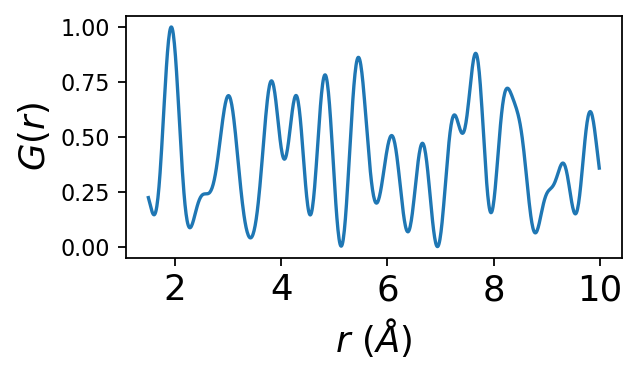

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 2), dpi = 160)
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)

x_axis = np.arange(1.5,10.0,0.01)

# ax.set_prop_cycle('color',plt.cm.RdPu(np.linspace(0,1,40)))

plt.plot(np.arange(1.5,10.0,0.01),df_all_joined.iloc[100,:])

plt.ylabel(r'$G(r)$', fontsize = 16)
plt.xlabel(r'$r~(\AA)$', fontsize = 16)
plt.xticks(fontsize=16)
plt.xticks(fontsize=16)
# plt.legend(fontsize = 12, loc = "upper right")
plt.show()



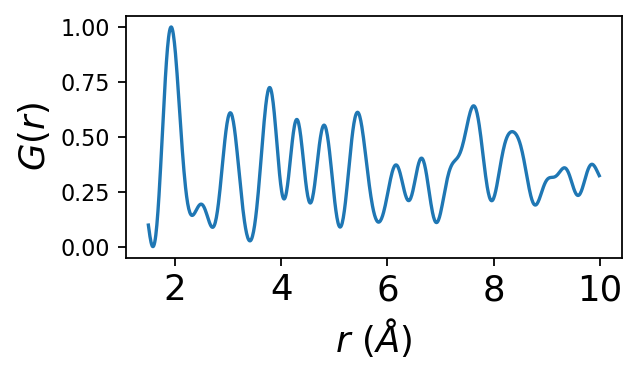

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 2), dpi = 160)
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)

x_axis = np.arange(1.5,10.0,0.01)

# ax.set_prop_cycle('color',plt.cm.RdPu(np.linspace(0,1,40)))

plt.plot(np.arange(1.5,10.0,0.01),df_exp.iloc[24,:])

plt.ylabel(r'$G(r)$', fontsize = 16)
plt.xlabel(r'$r~(\AA)$', fontsize = 16)
plt.xticks(fontsize=16)
plt.xticks(fontsize=16)
# plt.legend(fontsize = 12, loc = "upper right")
plt.show()

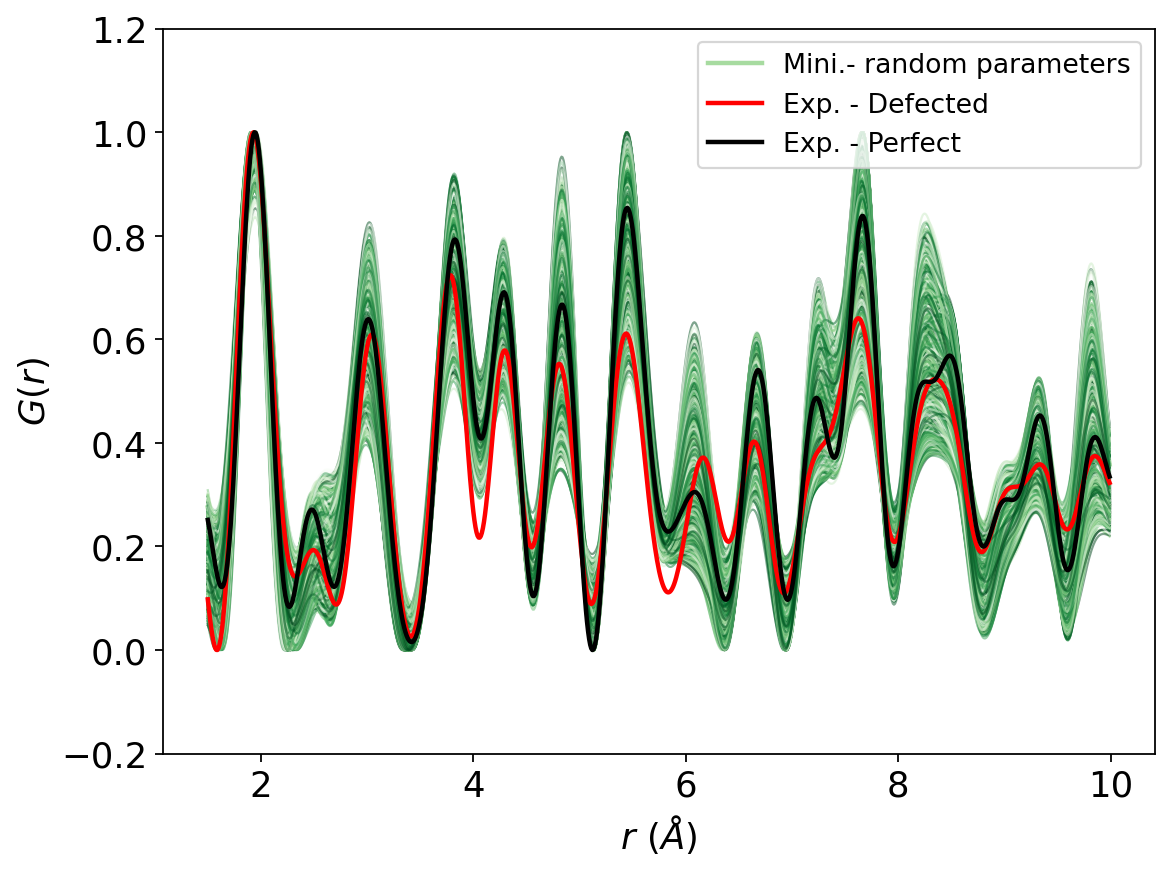

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6), dpi = 160)
x_axis = np.arange(1.5,10.0,0.01)

# ax.set_prop_cycle('color',plt.cm.Wistia(np.linspace(0,1,40)))
ax.set_prop_cycle('color',plt.cm.Greens(np.linspace(0,1,40)))

for i in range(3200):
    if i == 54: # just pick one structrue to show label
        plt.plot(x_axis,df_all_joined.iloc[i,:], linewidth = 2, label = 'Mini.- random parameters')
    else:
        plt.plot(x_axis,df_all_joined.iloc[i,:], linewidth = 1, alpha = 0.5)

# ax.set_prop_cycle('color',plt.cm.YlOrBr(np.linspace(0,1,40)))
# for i in range(1600,2400):
#     # ax.set_prop_cycle('color',plt.cm.Greys(np.linspace(0,1,40)))
#     if i == 1654: # just pick one structrue to show label
#         plt.plot(np.arange(1.5,10.0,0.01),df_all_joined.iloc[i,:], linewidth = 2, label = 'Mini.-fixed parameters')
#     else: 
#         plt.plot(x_axis,df_all_joined.iloc[i,:], linewidth = 0.75, alpha = 0.15)

i = 3224
plt.plot(np.arange(1.5,10.0,0.01),df_all_joined.iloc[i,:], color = 'r', linewidth = 2, label = 'Exp. - Defected')
i = 3234
plt.plot(np.arange(1.5,10.0,0.01),df_all_joined.iloc[i,:], color = 'k', linewidth = 2, label = 'Exp. - Perfect')
#     else: # Other experimental ones:
#         plt.plot(np.arange(1.5,10.0,0.01),df_all_joined.iloc[2400+i,:], color = 'g', alpha = 0.01*i)

plt.ylabel(r'$G(r)$', fontsize = 16)
plt.xlabel(r'$r~(\AA)$', fontsize = 16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([-0.2,1.2])

plt.legend(fontsize = 12, loc = "upper right")
plt.show()



In [39]:
def print_err(ls_a):
    s = ""
    for i in range(4):        
        s+='{:.0f}('.format(np.mean(ls_a, axis = 0)[i])+u"\u00B1"+"{:.0f})".format(np.std(ls_a, axis = 0)[i])
        s+=' '
    print(s)

## Hyperparametes tuning for CNN
### We use KerasTuner
### Learning Examples:
https://pythonprogramming.net/keras-tuner-optimizing-neural-network-tutorial/

https://blog.tensorflow.org/2020/01/hyperparameter-tuning-with-keras-tuner.html

https://keras.io/keras_tuner/

https://www.tensorflow.org/tutorials/keras/keras_tuner

In [27]:
# cnn model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.convolutional import AveragePooling1D
from sklearn.model_selection import train_test_split
import keras_tuner as kt
from keras_tuner.tuners import RandomSearch
from keras_tuner.tuners import Hyperband
from keras_tuner.engine.hyperparameters import HyperParameters
# from tensorflow import keras
# from tensorflow.keras.layers import (
#     Conv2D,
#     Dense,
#     Dropout,
#     Flatten,
#     MaxPooling2D
# )


In [28]:
X = df_all.iloc[:,:-4]
y_simu = df_all.iloc[:,-4:]

defect_str_lst = ["Ti vacancy","Ti interstitial","O vacancy","O interstitial"]
X_train, X_test, y_train, y_test = train_test_split(X, y_simu, test_size=0.2, random_state=42)
X_train_3d = np.reshape(np.array(X_train), (X_train.shape[0], X_train.shape[1], 1)) 
X_test_3d = np.reshape(np.array(X_test), (X_test.shape[0], X_test.shape[1], 1)) 


In [29]:
# Model version 2:
# fit and evaluate a model
trainX, trainy, testX, testy = X_train_3d, y_train, X_test_3d, y_test
verbose, epochs, batch_size = 1, 50, 64
val_split = 0.2
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]



In [ ]:
# conv -> pool -> conv -> pool -> dropout 

# kernel size calculation
# output size = [(W-K+2P)/S] + 1
# P = padding = 0
# S = stride = 1 if not specified
# K = kernel size
# W = input size = 850 (convolution is happening in one sample/curve)
# output size > 4 (4 digits of y)
# 4 = (850-K)/1
# K = 850 - 4 = 846 1st layer
# max pool 1D 846 / max_value = 20 = 40 something
# 40 < 50 so max kernel size is too large

### how to determine kernel size
# changed max_value from 50 to 30

In [148]:
# Write a function that creates and returns a Keras model. 
# Use the hp argument to define the hyperparameters during model creation.
import time
LOG_DIR = f"0318_{int(time.time())}"

def build_model(hp):
    model = Sequential()
    n_filters = hp.Int('filters_1', min_value=10, max_value=50, step=10)
    stride_1 = hp.Int('strides_1', min_value=1, max_value=3, step=1)
    model.add(Conv1D(filters=n_filters, 
        kernel_size=hp.Int('kernel_size_1', min_value=5, max_value=80, step=5), 
        strides = stride_1, 
        activation=hp.Choice('activation_conv_1d_1', ['relu','tanh','sigmoid']), input_shape=(n_timesteps,n_features)))

    model_type1 = hp.Choice("model_type_1", ["maxpool", "avgpool"])
    poolsize_1 = hp.Int('pool_size_1', min_value=2, max_value=4, step=1)
    if model_type1 == "maxpool":
        with hp.conditional_scope("model_type_1", ["maxpool"]):
            model.add(MaxPooling1D(pool_size= poolsize_1))
    if model_type1 == "avgpool":
        with hp.conditional_scope("model_type_1", ["avgpool"]):
            model.add(AveragePooling1D(pool_size=poolsize_1))

    stride_2 = hp.Int('strides_2', min_value=1, max_value=3, step=1)            
    kernel_size_2 = hp.Int('kernel_size_2', min_value= 5, max_value= 60, step=5)

    model.add(Conv1D(filters=hp.Int('filters_2',
        min_value= 10,
        max_value= 70,
        step=10), 
        kernel_size= kernel_size_2, 
        strides = stride_2, 
        activation=hp.Choice('activation_conv_1d_2', ['relu','tanh','sigmoid']), input_shape=(n_timesteps,n_features)))

    model_type2 = hp.Choice("model_type_2", ["maxpool", "avgpool"])
    poolsize_2 = hp.Int('pool_size_2', min_value=2, max_value=4, step=1)
    
    if model_type2 == "maxpool":
        with hp.conditional_scope("model_type_2", ["maxpool"]):
            model.add(MaxPooling1D(pool_size = poolsize_2))
    if model_type2 == "avgpool":
        with hp.conditional_scope("model_type_2", ["avgpool"]):
            model.add(AveragePooling1D(pool_size = poolsize_2))
    
    model.add(Dropout(hp.Float('dropout', 0, 0.5, step=0.1, default=0.5)))
    # Adding variation of layers:
#     for i in range(hp.Int('n_layersConv', 0, 1)):  # adding variation of layers.
#         model.add(Conv1D(filters=hp.Int(f'conv_{i}_units',
#             min_value=10,
#             max_value=80,
#             step=10), 
#             kernel_size=hp.Int('kernel_size',
#             min_value=5,
#             max_value=50,
#             step=5), 
#             activation=hp.Choice('activation', ['relu','tanh','sigmoid']), input_shape=(n_timesteps,n_features)))

    for i in range(hp.Int('n_layersDense', 1, 3)):  # adding variation of layers.
        model.add(Dense(hp.Int(f'dense_{i}_units',
                                min_value=8,
                                max_value=64,
                                step=8), 
                        activation=hp.Choice(f'activation_{i}_dense', ['relu']))) #, 'tanh', 'sigmoid'

    model.add(Flatten())              
    model.add(Dense(n_outputs, activation= 'relu' )) #, 'tanh', 'sigmoid'
    model.compile(loss='mean_squared_error',optimizer='adam', metrics=['RootMeanSquaredError'])
    return model # Notice that we're not fitting there, and we're returning the compiled mode

In [149]:
# tuner = RandomSearch(
#     build_model,
#     objective=kt.Objective('root_mean_squared_error', direction='min'),
#     max_trials=20,  # how many model variations to test?
#     executions_per_trial = 1,# how many trials per variation? (same model could perform differently)
#     directory=LOG_DIR, project_name = "1DCNN")

tuner = Hyperband(
    build_model,
    hyperband_iterations = 2,
    max_epochs = 30,
    factor=3,
    objective=kt.Objective('root_mean_squared_error', direction='min'),
    executions_per_trial = 1,# how many trials per variation? (same model could perform differently)
    directory=LOG_DIR, project_name = "1DCNN")

In [150]:
tuner.search_space_summary()


Search space summary
Default search space size: 16
filters_1 (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 50, 'step': 10, 'sampling': None}
strides_1 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': None}
kernel_size_1 (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 80, 'step': 5, 'sampling': None}
activation_conv_1d_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid'], 'ordered': False}
model_type_1 (Choice)
{'default': 'maxpool', 'conditions': [], 'values': ['maxpool', 'avgpool'], 'ordered': False}
pool_size_1 (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 4, 'step': 1, 'sampling': None}
strides_2 (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': None}
kernel_size_2 (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 60, 'step': 5, 'sampling': None}
filters_2 (Int)


In [151]:
Do not run!
%%time
tuner.search(x=trainX,
             y=trainy,
             verbose=2, # just slapping this here bc jupyter notebook. The console out was getting messy.
             epochs=10,
             batch_size=64,
             #callbacks=[tensorboard],  # if you have callbacks like tensorboard, they go here.
             validation_data=(testX, testy))

Trial 180 Complete [00h 00m 50s]
root_mean_squared_error: 14.619733810424805

Best root_mean_squared_error So Far: 5.6557393074035645
Total elapsed time: 00h 35m 44s
INFO:tensorflow:Oracle triggered exit
CPU times: user 3h 5min 6s, sys: 10min 48s, total: 3h 15min 54s
Wall time: 35min 44s


In [170]:
i = 0
top_n = 10
display(tuner.get_best_hyperparameters(top_n)[i].values)
tuner.get_best_models(num_models=top_n)[i].summary()

{'filters_1': 40,
 'strides_1': 1,
 'kernel_size_1': 5,
 'activation_conv_1d_1': 'tanh',
 'model_type_1': 'maxpool',
 'pool_size_1': 2,
 'strides_2': 1,
 'kernel_size_2': 45,
 'filters_2': 30,
 'activation_conv_1d_2': 'relu',
 'model_type_2': 'maxpool',
 'pool_size_2': 2,
 'dropout': 0.1,
 'n_layersDense': 3,
 'dense_0_units': 40,
 'activation_0_dense': 'relu',
 'dense_1_units': 64,
 'activation_1_dense': 'relu',
 'dense_2_units': 32,
 'activation_2_dense': 'relu',
 'tuner/epochs': 30,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 846, 40)           240       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 423, 40)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 379, 30)           54030     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 189, 30)           0         
_________________________________________________________________
dropout (Dropout)            (None, 189, 30)           0         
_________________________________________________________________
dense (Dense)                (None, 189, 40)           1240      
_________________________________________________________________
dense_1 (Dense)              (None, 189, 64)           2

In [173]:
model=tuner.get_best_models(num_models=top_n)[i]#tuner.get_best_models(num_models=1)[0]
model = tensorflow.keras.models.clone_model(model)
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['RootMeanSquaredError'])
history = model.fit(trainX, trainy, validation_split = val_split, epochs=60, batch_size=batch_size, verbose=verbose)


Epoch 1/60
32/32 [==============================] - 4s 137ms/step - loss: 1132.1259 - root_mean_squared_error: 33.6471 - val_loss: 985.1163 - val_root_mean_squared_error: 31.3866
Epoch 2/60
32/32 [==============================] - 4s 119ms/step - loss: 919.9412 - root_mean_squared_error: 30.3305 - val_loss: 979.4451 - val_root_mean_squared_error: 31.2961
Epoch 3/60
32/32 [==============================] - 4s 123ms/step - loss: 910.2513 - root_mean_squared_error: 30.1704 - val_loss: 968.5724 - val_root_mean_squared_error: 31.1219
Epoch 4/60
32/32 [==============================] - 4s 136ms/step - loss: 901.9458 - root_mean_squared_error: 30.0324 - val_loss: 975.4607 - val_root_mean_squared_error: 31.2324
Epoch 5/60
32/32 [==============================] - 4s 125ms/step - loss: 896.2062 - root_mean_squared_error: 29.9367 - val_loss: 953.4467 - val_root_mean_squared_error: 30.8779
Epoch 6/60
32/32 [==============================] - 4s 124ms/step - loss: 870.9110 - root_mean_squared_error:

In [37]:
# Write a function that creates and returns a Keras model. 
# Use the hp argument to define the hyperparameters during model creation.
import time

model = Sequential()
model.add(Conv1D(filters=20, 
    kernel_size=5, 
    strides = 1, 
    activation='tanh', input_shape=(n_timesteps,n_features)))


model.add(MaxPooling1D(pool_size= 2))


model.add(Conv1D(filters=20,
    kernel_size= 45, 
    strides = 1, 
    activation='relu', input_shape=(n_timesteps,n_features)))

model.add(MaxPooling1D(pool_size = 2))

model.add(Dropout(0.1))
model.add(Dense(40,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))

model.add(Flatten())              
model.add(Dense(n_outputs, activation= 'relu' )) #, 'tanh', 'sigmoid'
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['RootMeanSquaredError'])


In [38]:
from keras.models import load_model
# f_name = 'my_model_0318.h5'
# model.save(f_name)  # creates a HDF5 file 'my_model.h5'
# del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
# model = load_model(f_name)
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['RootMeanSquaredError'])
history = model.fit(trainX, trainy, validation_split = val_split, epochs=60, batch_size=batch_size, verbose=verbose)


Epoch 1/60
32/32 [==============================] - 3s 84ms/step - loss: 1176.7882 - root_mean_squared_error: 34.3043 - val_loss: 1030.8241 - val_root_mean_squared_error: 32.1065
Epoch 2/60
32/32 [==============================] - 3s 81ms/step - loss: 969.7067 - root_mean_squared_error: 31.1401 - val_loss: 1027.5217 - val_root_mean_squared_error: 32.0550
Epoch 3/60
32/32 [==============================] - 3s 80ms/step - loss: 964.5022 - root_mean_squared_error: 31.0564 - val_loss: 1027.9932 - val_root_mean_squared_error: 32.0623
Epoch 4/60
32/32 [==============================] - 3s 83ms/step - loss: 955.7630 - root_mean_squared_error: 30.9154 - val_loss: 1009.4122 - val_root_mean_squared_error: 31.7712
Epoch 5/60
32/32 [==============================] - 3s 83ms/step - loss: 954.5767 - root_mean_squared_error: 30.8962 - val_loss: 1006.5042 - val_root_mean_squared_error: 31.7255
Epoch 6/60
32/32 [==============================] - 3s 83ms/step - loss: 949.2479 - root_mean_squared_error: 

32/32 [==============================] - 3s 93ms/step - loss: 38.4710 - root_mean_squared_error: 6.2025 - val_loss: 49.2678 - val_root_mean_squared_error: 7.0191
Epoch 48/60
32/32 [==============================] - 3s 87ms/step - loss: 38.4619 - root_mean_squared_error: 6.2018 - val_loss: 52.5101 - val_root_mean_squared_error: 7.2464
Epoch 49/60
32/32 [==============================] - 3s 88ms/step - loss: 36.3693 - root_mean_squared_error: 6.0307 - val_loss: 38.3421 - val_root_mean_squared_error: 6.1921
Epoch 50/60
32/32 [==============================] - 4s 110ms/step - loss: 36.8562 - root_mean_squared_error: 6.0709 - val_loss: 45.3121 - val_root_mean_squared_error: 6.7314
Epoch 51/60
32/32 [==============================] - 3s 101ms/step - loss: 35.7184 - root_mean_squared_error: 5.9765 - val_loss: 46.9012 - val_root_mean_squared_error: 6.8484
Epoch 52/60
32/32 [==============================] - 3s 103ms/step - loss: 36.5194 - root_mean_squared_error: 6.0431 - val_loss: 49.6786 - v

RMSE:6.364488124847412
dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])


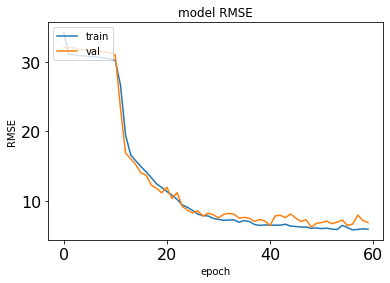

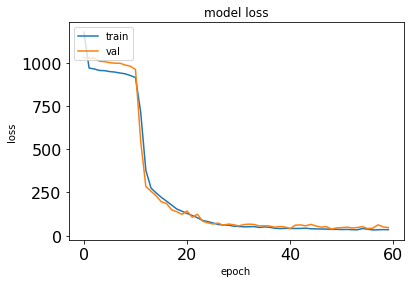

In [40]:
# list all data in history
_, RMSE = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
print("RMSE:" + str(RMSE))
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model RMSE')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Previous Work: 
[72.5096   34.662033  0.       68.59582 ]
Perfect Structure: 
[0.         0.         0.31090567 0.        ]


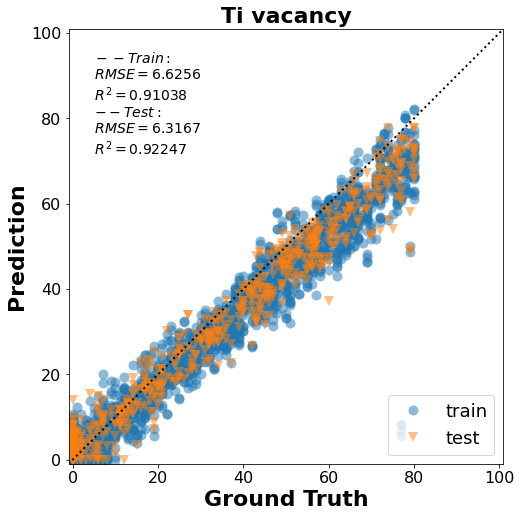

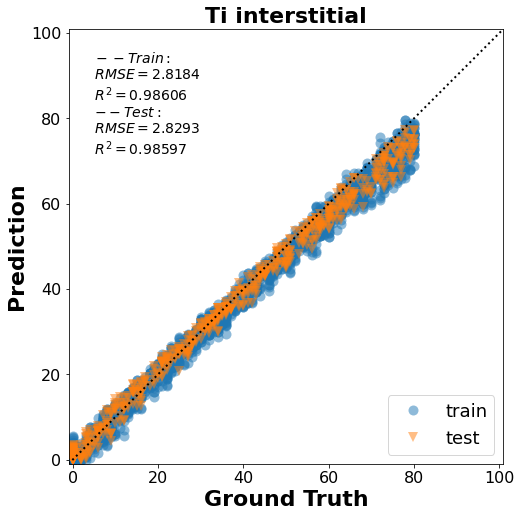

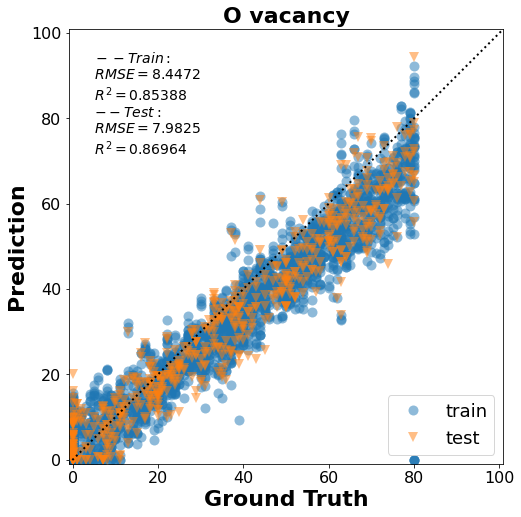

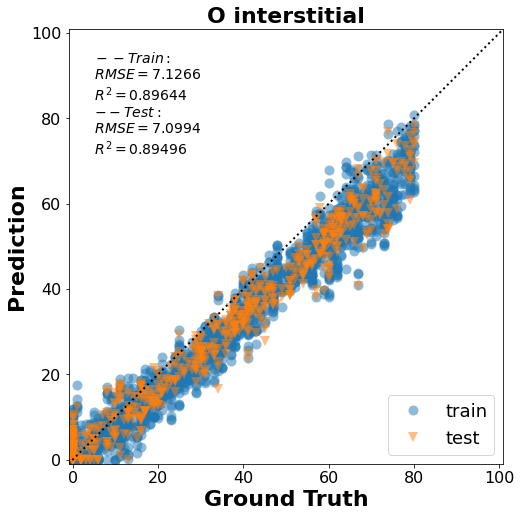

In [41]:
X_exp = df_exp.copy()
# display(X_exp)
X_exp_3d = np.reshape(np.array(X_exp), (X_exp.shape[0], X_exp.shape[1], 1))

predicted_exp = model.predict(X_exp_3d)
print("Previous Work: ")
print(predicted_exp[24])
print("Perfect Structure: ")
print(predicted_exp[34])


import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Font for figure for publishing
font_axis_publish = {
        'color':  'black',
        'weight': 'bold',
        'size': 22,
        }
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16

train_pred = model.predict(X_train_3d)
train_true = y_train

test_pred = model.predict(X_test_3d)
test_true = y_test

# train_pred = regr.predict(X_pca_nn_train)
# train_true = y_train

# test_pred = regr.predict(X_pca_nn_test)
# test_true = y_test

for i in range(4):

    # Plot Figures
    fignow = plt.figure(figsize=(8,8))

    
    defect_str = defect_str_lst[i]

    plt_train_pred = train_pred[:,i] 
    plt_train_true = train_true.iloc[:,i]

    plt_test_pred = test_pred[:,i] 
    plt_test_true = test_true.iloc[:,i]
    
## find the boundaries of X and Y values
# bounds = (min(x2plt_Ti.min(), x2plt_Ti.min()) - int(0.1 * y2plt_Ti.min()), max(x2plt.max(), y2plt_Ti.max())+ int(0.1 * y2plt_Ti.max()))
    bounds = (-1, 101)

    # Reset the limits
    ax = plt.gca()
    ax.set_xlim(bounds)
    ax.set_ylim(bounds)
    # Ensure the aspect ratio is square
    ax.set_aspect("equal", adjustable="box")

    plt.plot(plt_train_true,plt_train_pred,"o", alpha=0.5 ,ms=10, markeredgewidth=0.0, label = "train")
    plt.plot(plt_test_true,plt_test_pred,"v", alpha=0.5 ,ms=10, markeredgewidth=0.0, label = "test")

    ax.plot([0, 1], [0, 1], "k:",lw=2 ,transform=ax.transAxes)

    # Calculate Statistics of the Parity Plot 

    rmse_train = np.sqrt(np.mean((plt_train_pred-plt_train_true)**2))
    rmse_test = np.sqrt(np.mean((plt_test_pred-plt_test_true)**2))


    text = f"$\: -- Train: $ \n $ RMSE = {rmse_train:0.4f}$ \n $R^2 = {r2_score(plt_train_pred,plt_train_true):0.5f}$ \n $ --Test: $ \n $ RMSE = {rmse_test:0.4f}$ \n $R^2 = {r2_score(plt_test_pred,plt_test_true):0.5f}$"

    plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
         fontsize=14, verticalalignment='top')

    # Title and labels 
    plt.title(defect_str, fontdict=font_axis_publish)
    plt.ylabel('Prediction', fontdict=font_axis_publish)
    plt.xlabel('Ground Truth', fontdict=font_axis_publish)
    plt.legend(loc = "lower right", fontsize = 18)
    plt.show()

# Save the figure into 300 dpi
# fignow.savefig("parityplot.png",format = "png",dpi=300,bbox_inches='tight')

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 846, 20)           120       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 423, 20)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 379, 20)           18020     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 189, 20)          0         
 1D)                                                             
                                                                 
 dropout (Dropout)           (None, 189, 20)           0         
                                                                 
 dense (Dense)               (None, 189, 40)           8

## Feature Visualization
https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

In [43]:
import tensorflow as tf

# visualize convolution layers
# all are 3x3 filters
for layer in model.layers:
#     if 'conv' not in layer.name:
#         continue
    # get filter weights
    print(layer.name)
    
# shape: (kernel size, depth, number of filters)

conv1d
max_pooling1d
conv1d_1
max_pooling1d_1
dropout
dense
dense_1
dense_2
flatten
dense_3


In [44]:
# visualize convolution layers
# all are 3x3 filters
for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)
    
# shape: (kernel size, depth, number of filters)

conv1d (5, 1, 20)
conv1d_1 (45, 20, 20)


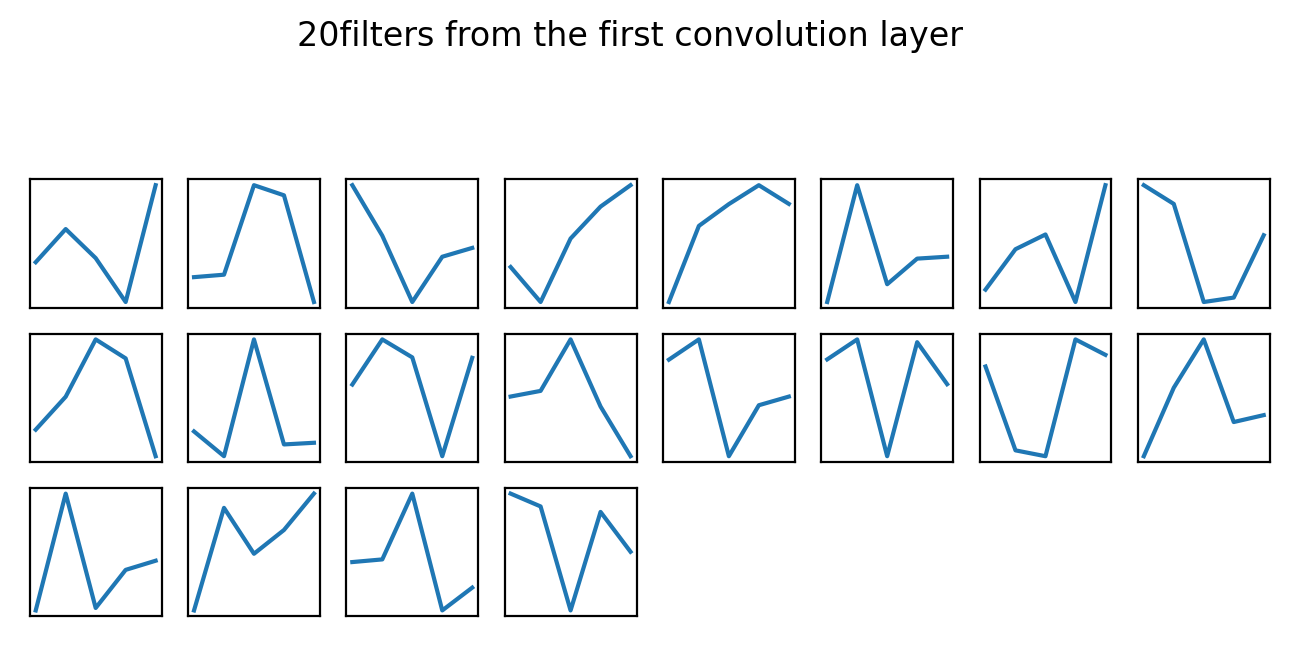

In [45]:
from matplotlib import pyplot

# retrieve weights from the second hidden layer
filters, biases = model.layers[0].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

fig = pyplot.figure(figsize=(8,8), dpi = 200)
n_filters, ix = filters.shape[2], 1    
fake_x = np.arange(0,filters.shape[0])

fig.suptitle(str(n_filters)+"filters from the first convolution layer")

for i in range(n_filters):
    # get the filter
    f = filters[:, :, i] # width, height, filter #
    # plot each channel separately
    # specify subplot and turn on axis
    ax = pyplot.subplot(8, 8, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    pyplot.plot(fake_x, f)
#     imshow(f, cmap='gray')
    ix += 1
# show the figure
pyplot.show()

# save figure
# fig.savefig("first conv layer.png")

# x-axis: 35 values in filter (size of kernel)
# y-axis: weights for each index

In [46]:
# redefine model to output right after the first hidden layer
model_vis = tf.keras.Model(inputs=model.inputs, outputs=model.layers[0].output)
for layer in model_vis.layers:
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters = layer.get_weights()
    print(layer.name, np.shape(filters))

conv1d_input (0,)
conv1d (2,)


/home/jie/anaconda3/envs/sklearn-env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [47]:
X_exp_defect = X_exp.iloc[24,:]
X_exp_3d_vis = np.reshape(np.array(X_exp_defect), (1, X_exp_defect.shape[0], 1))

X_exp_perf = X_exp.iloc[34,:]
X_exp_3d_vis_perf = np.reshape(np.array(X_exp_perf), (1, X_exp_perf.shape[0], 1))


X_simu_vis = df_all.iloc[233,:-4] #id 233 (index from 0 would be 237)	56	3	0	22
X_simu_3d_vis = np.reshape(np.array(X_simu_vis), (1, X_simu_vis.shape[0],1))


In [48]:
df_all.iloc[233,:]

0       0.160199
1       0.147715
2       0.134100
3       0.119650
4       0.104698
         ...    
849     0.298037
850    37.000000
851    68.000000
852     0.000000
853    57.000000
Name: 233, Length: 854, dtype: float64

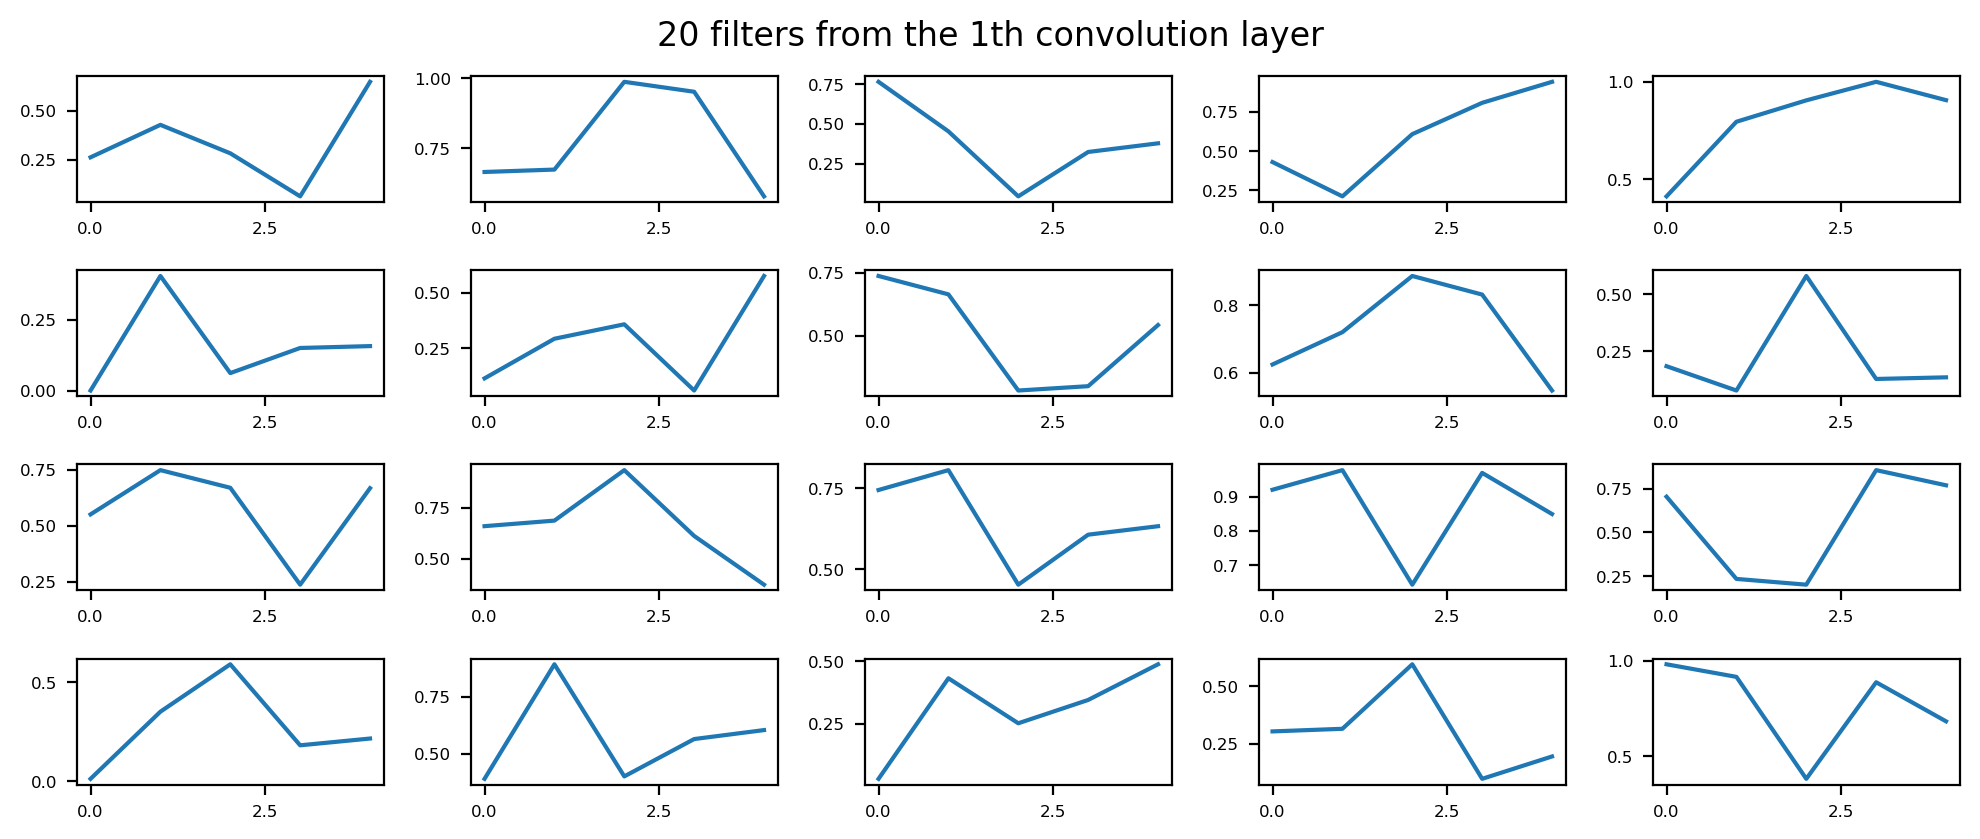

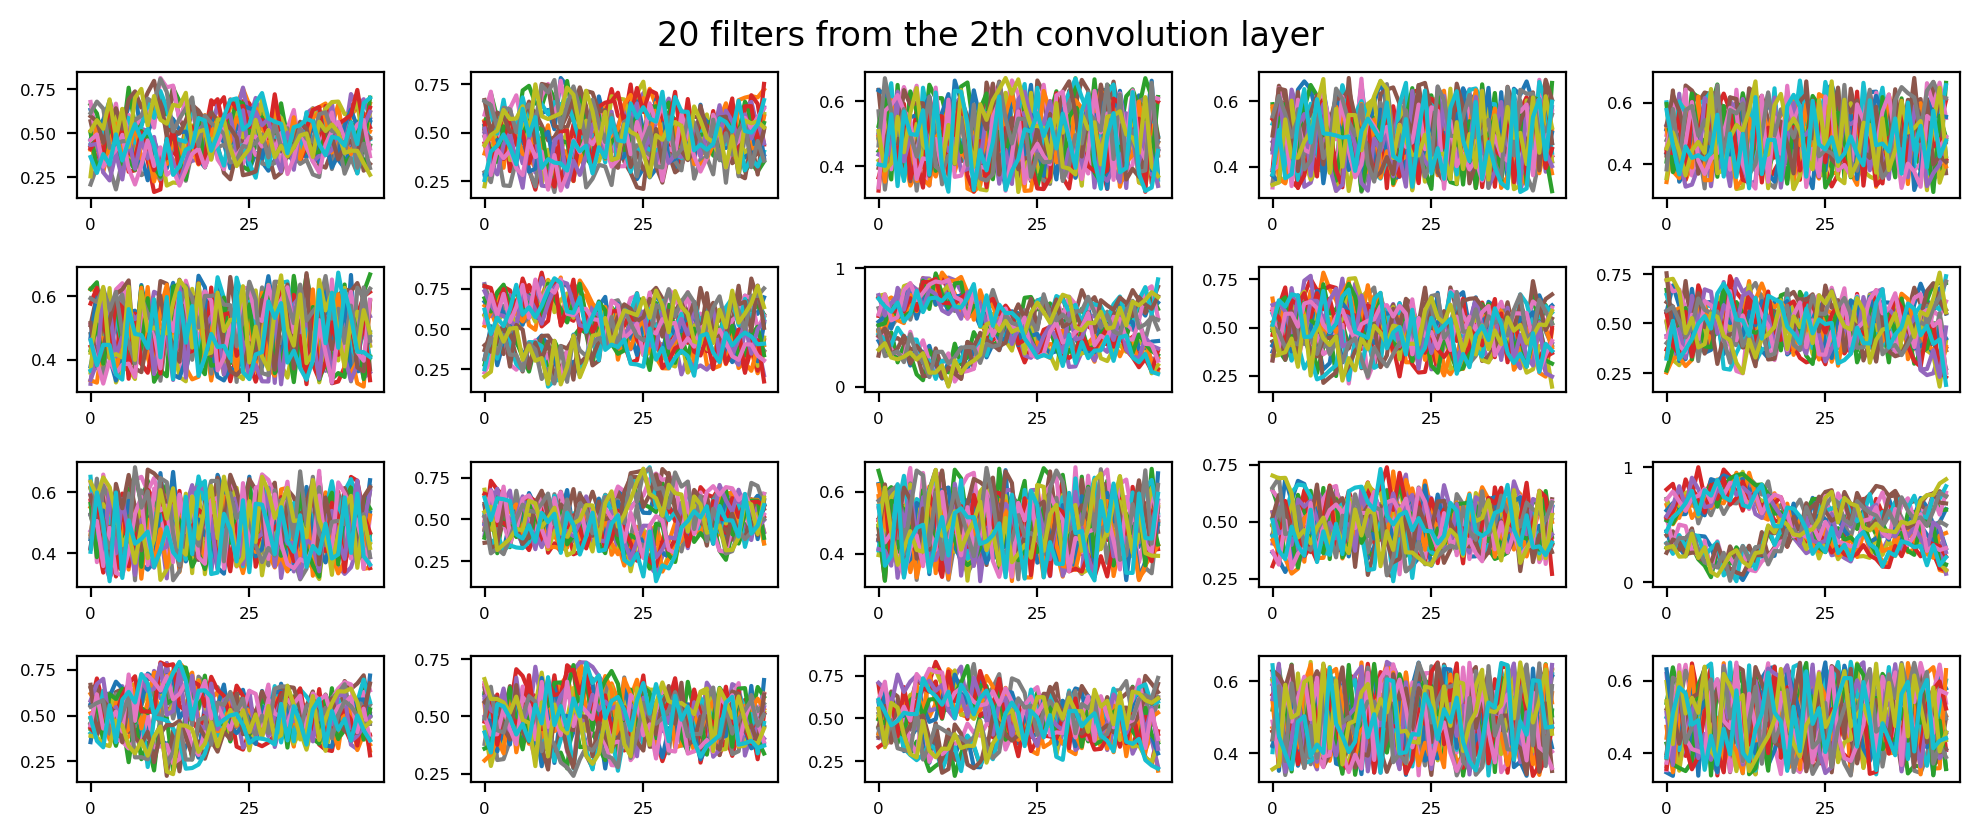

In [56]:
from matplotlib import pyplot

counter = 0
for filter_i in [1, 3]:
    counter += 1
    # retrieve weights from the second hidden layer
    filters, biases = model_vis.layers[filter_i].get_weights()
    # normalize filter values to 0-1 so we can visualize them
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)

    fig = pyplot.figure(figsize=(10,10), dpi = 200)
    n_filters, ix = filters.shape[2], 1    
    fake_x = np.arange(0,filters.shape[0])

    fig.suptitle(str(n_filters)+" filters from the "+str(counter)+"th convolution layer")

    for i in range(n_filters):
        # get the filter
        f = filters[:, :, i] # width, height, filter #
        # plot each channel separately
        # specify subplot and turn on axis
        ax = pyplot.subplot(10, 5, ix)
    #     ax.set_xticks([])
    #     ax.set_yticks([])

        # plot filter channel in grayscale
        pyplot.plot(fake_x, f)
        pyplot.setp(ax.get_xticklabels(), fontsize=6)
        pyplot.setp(ax.get_yticklabels(), fontsize=6)
        fig.tight_layout()
    #     imshow(f, cmap='gray')
        ix += 1
    # show the figure
    pyplot.show()

# save figure
# fig.savefig("first conv layer.png")

# x-axis: 35 values in filter (size of kernel)
# y-axis: weights for each index

In [52]:
len(model.layers)

10

1 846 20


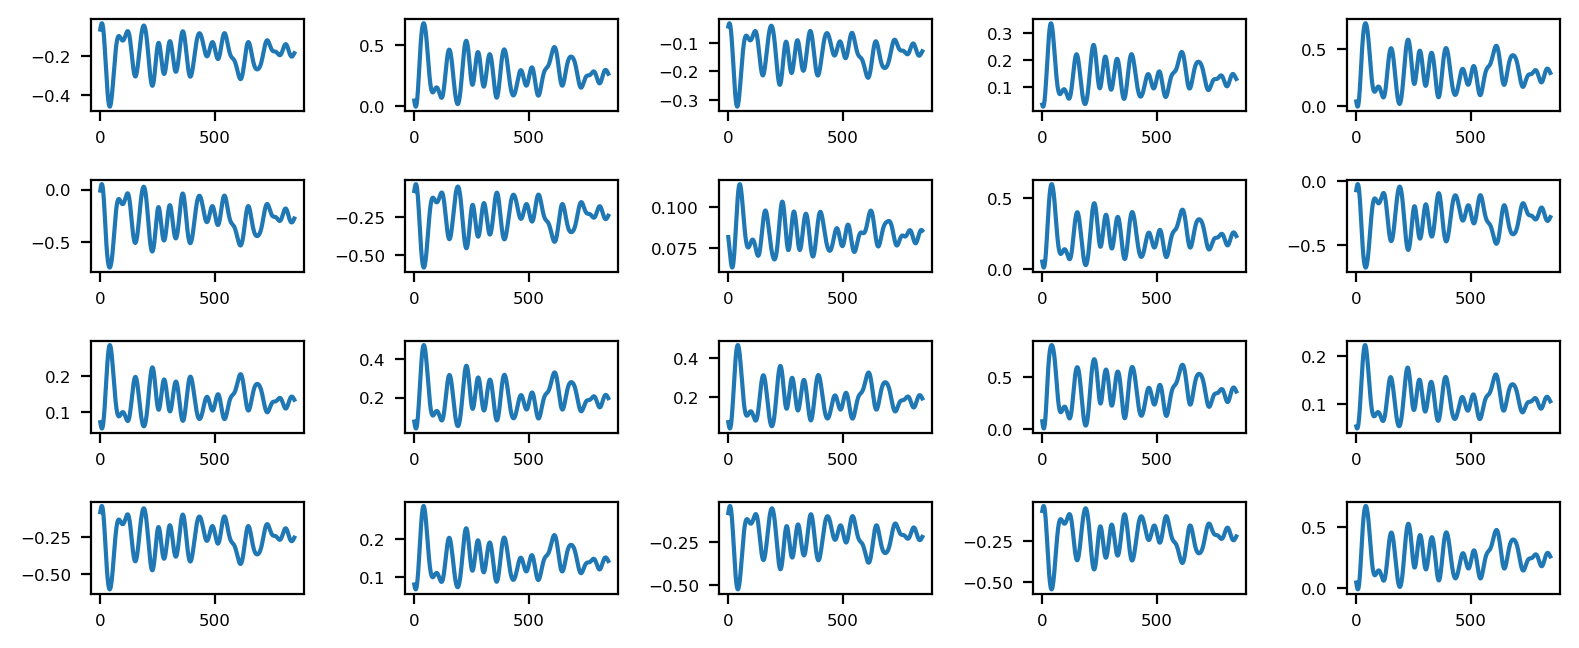

1 423 20


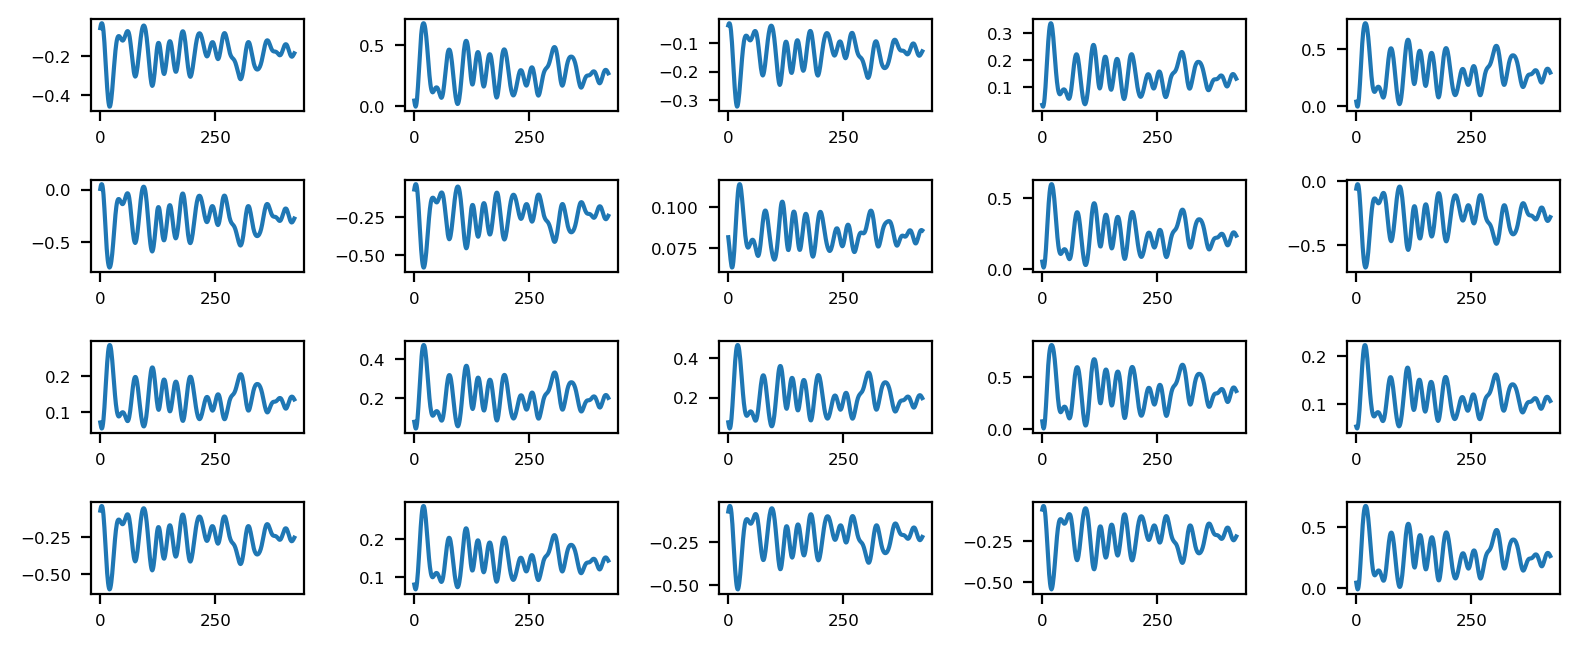

1 379 20


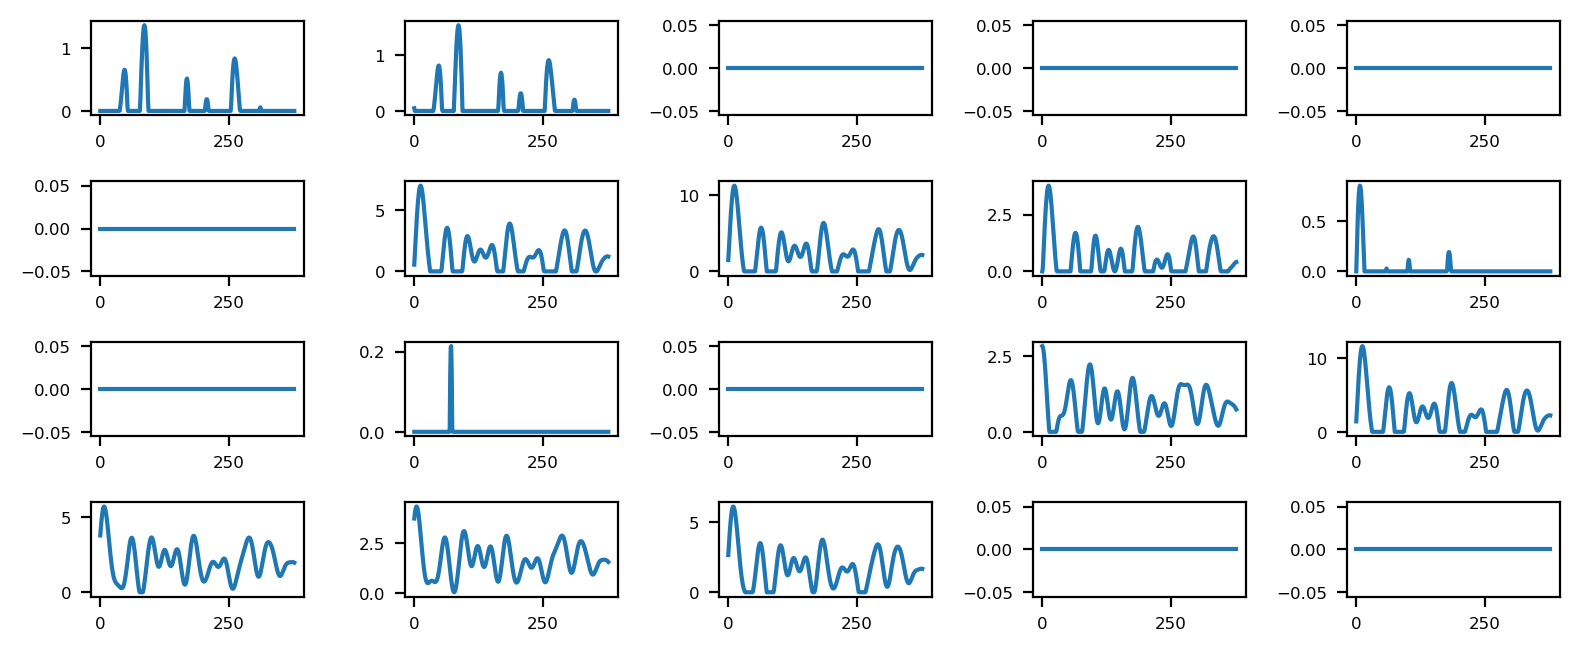

1 189 20


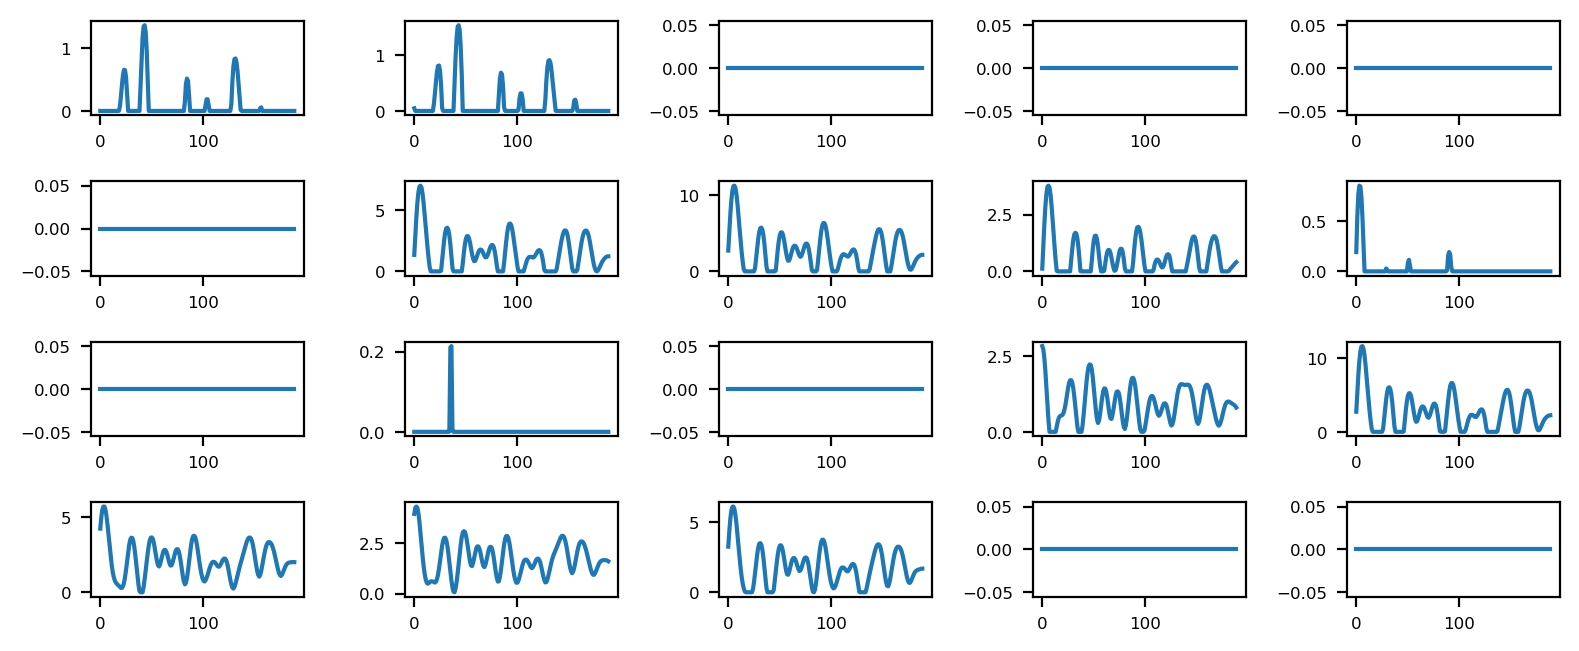

1 189 20


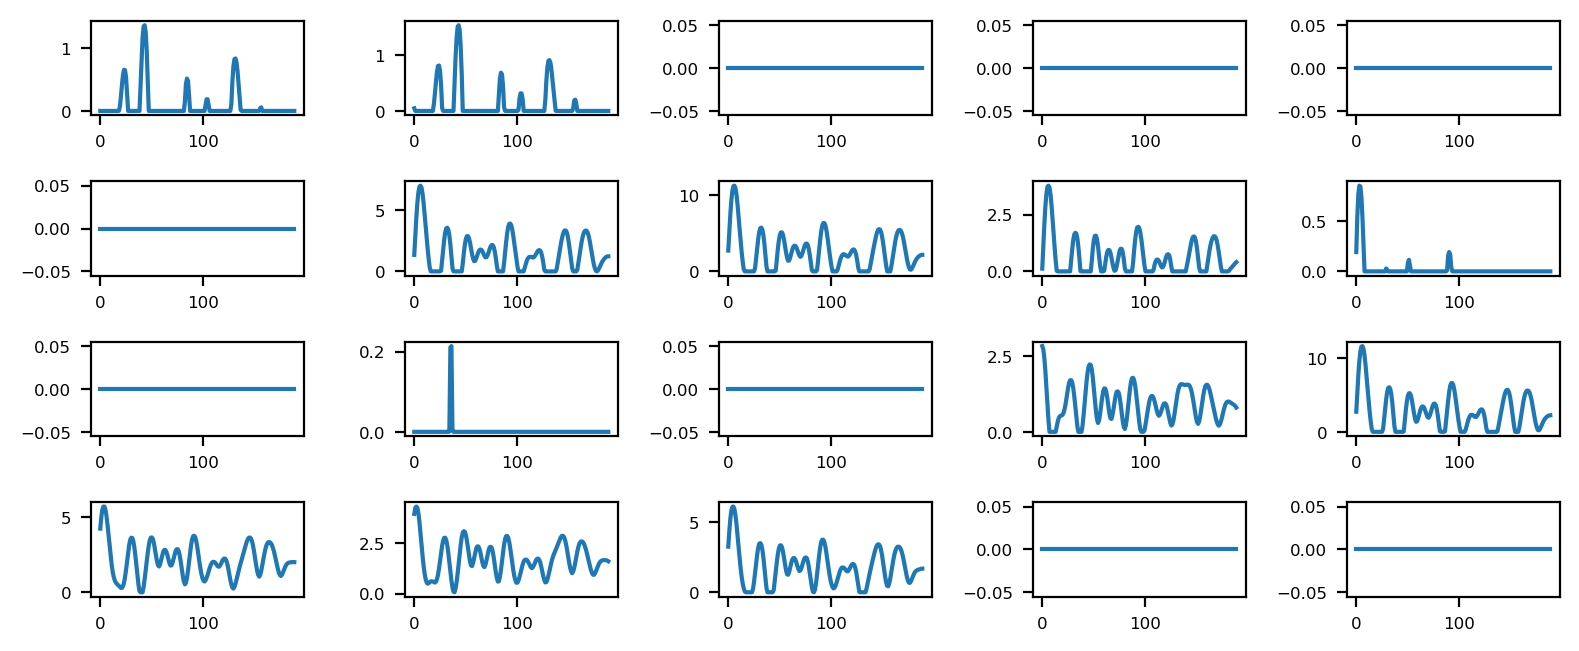

1 189 40


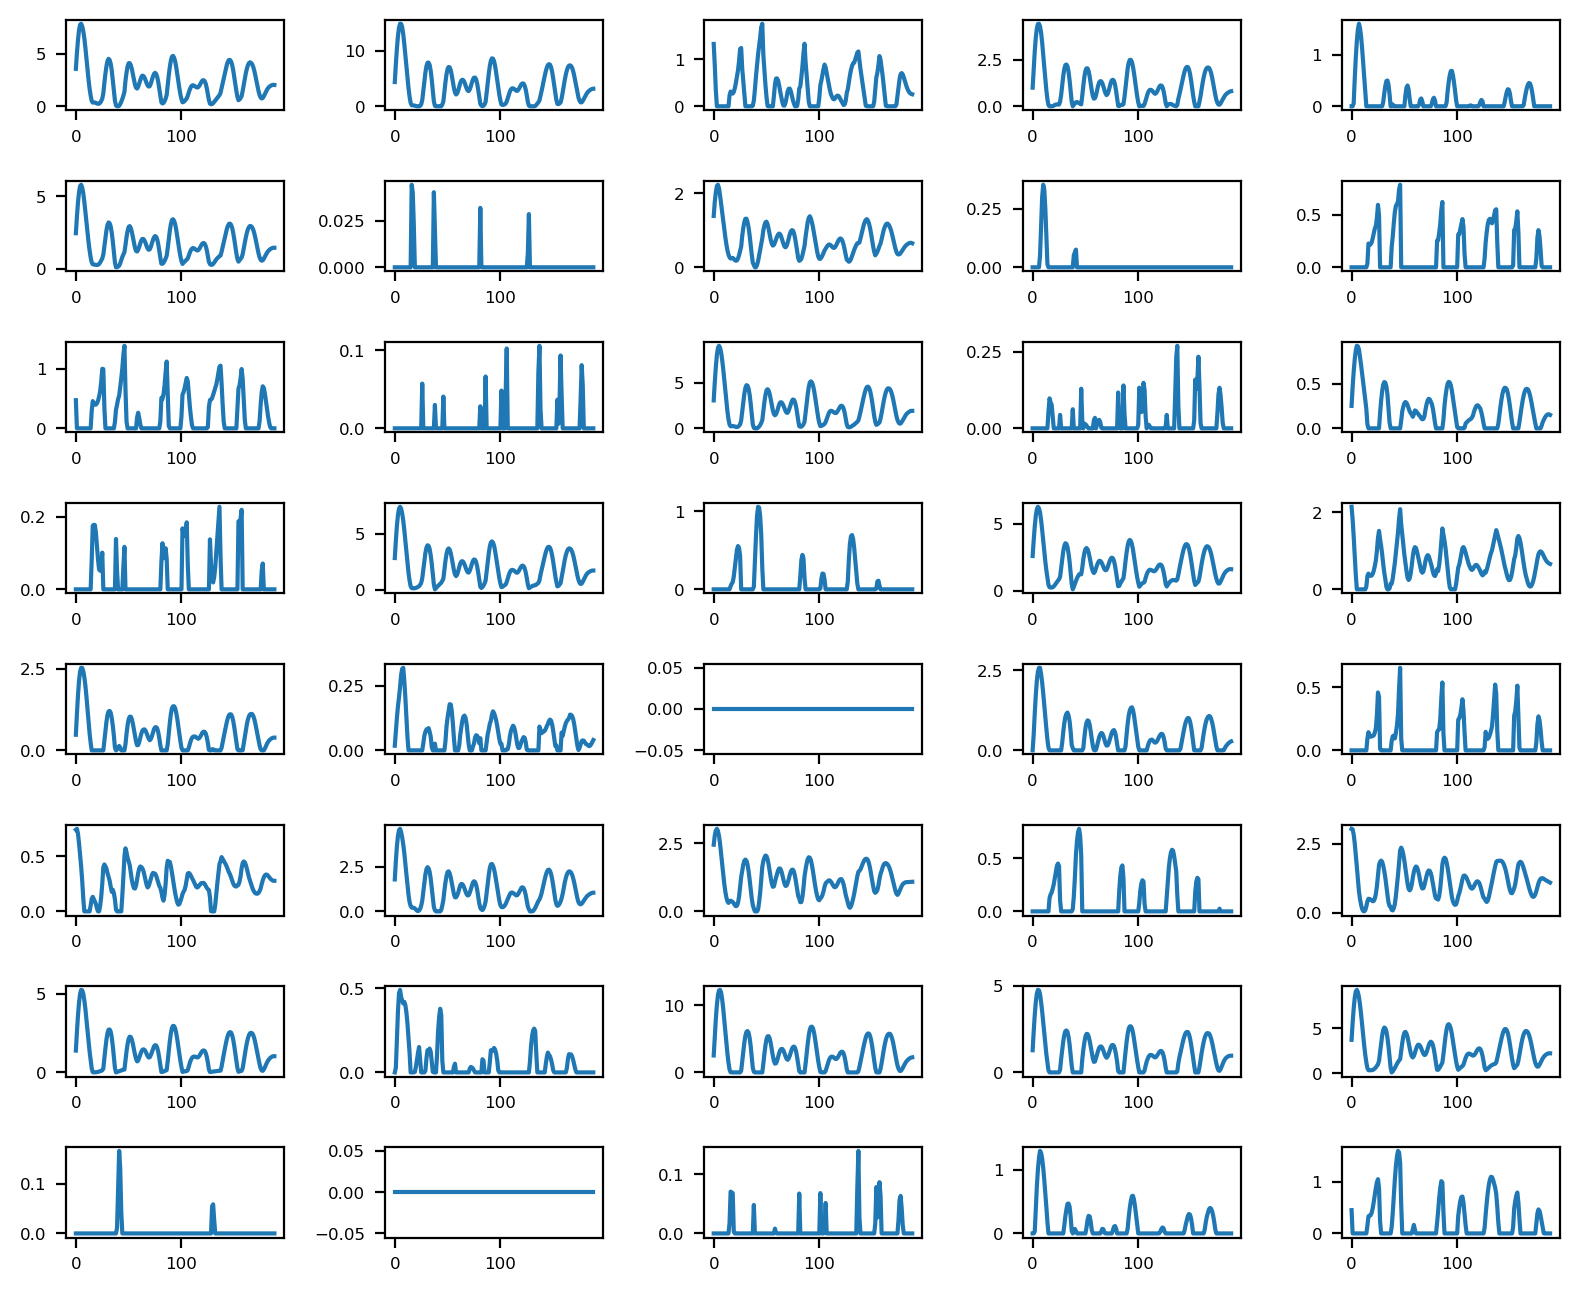

1 189 64


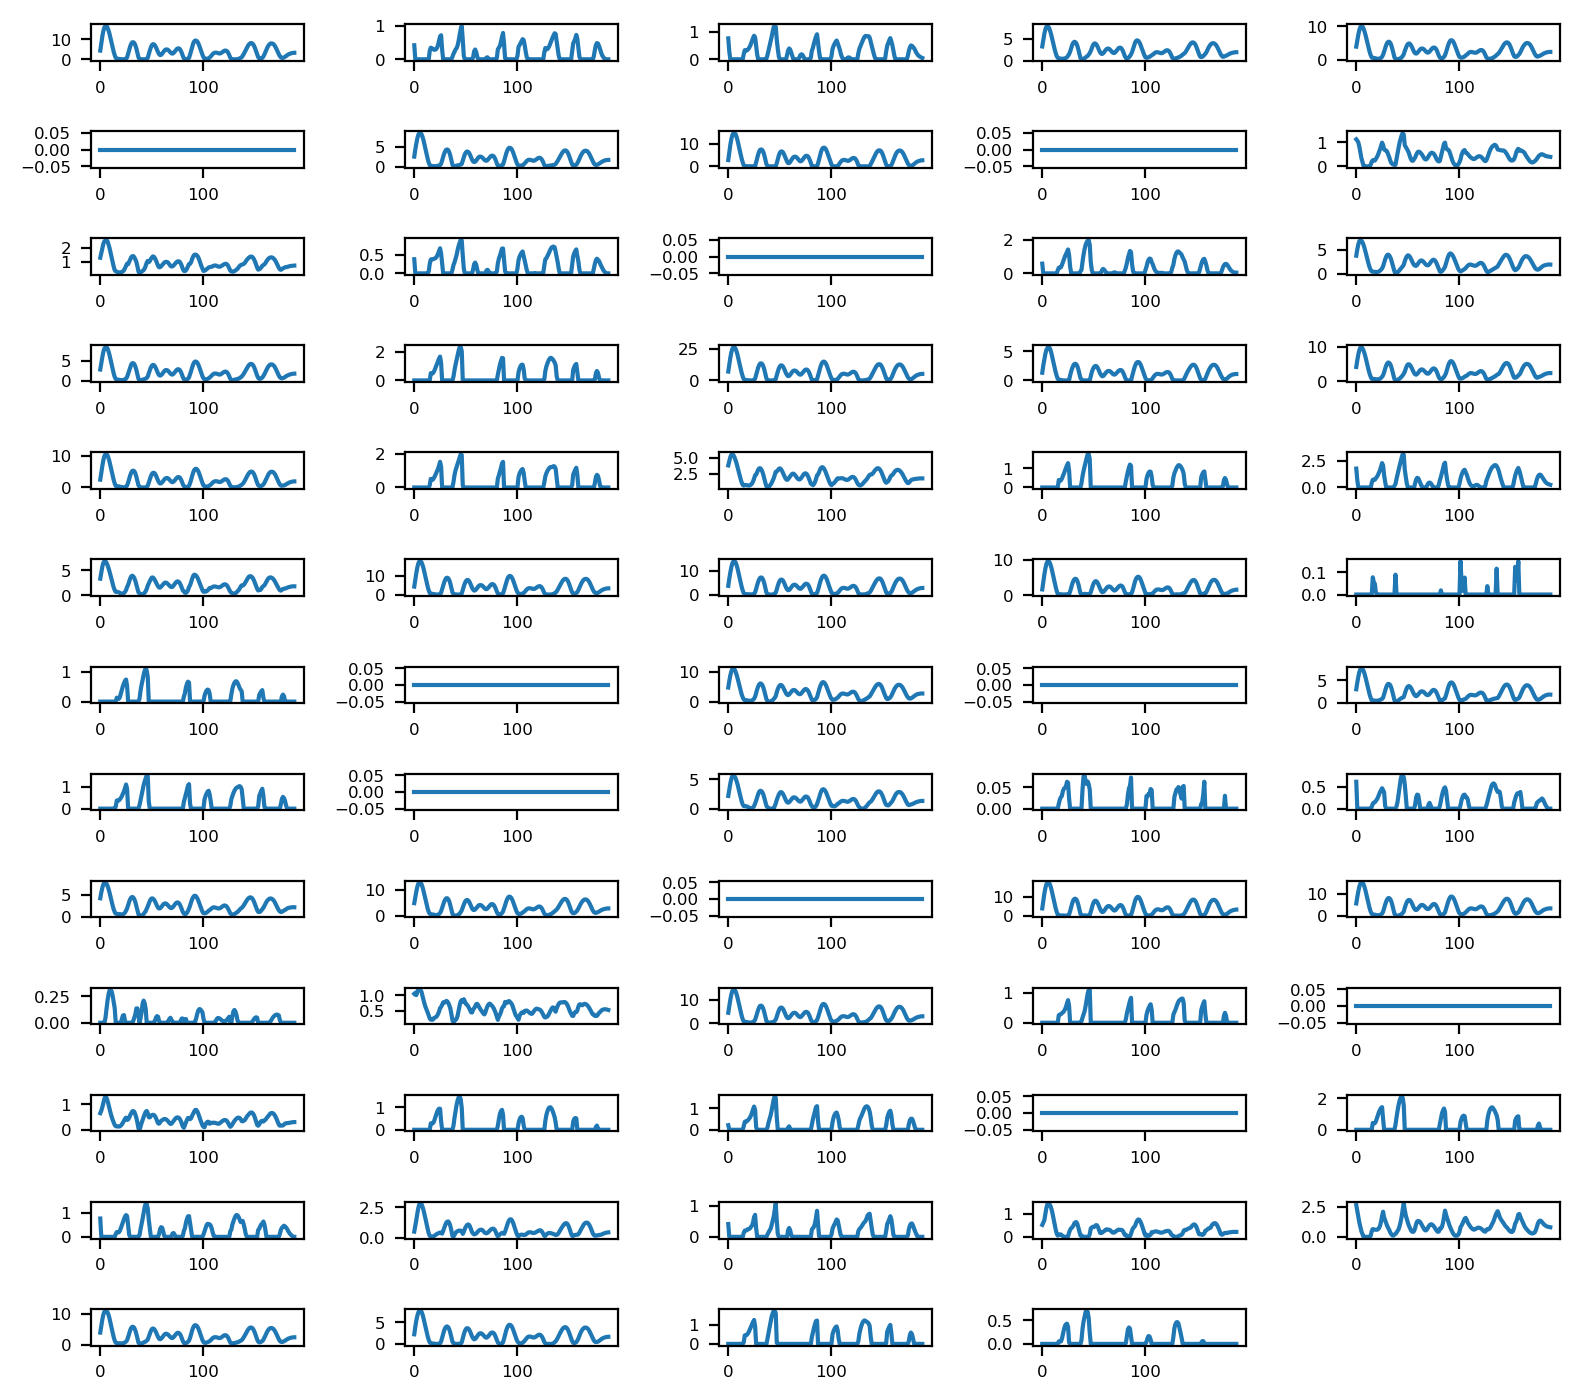

1 189 32


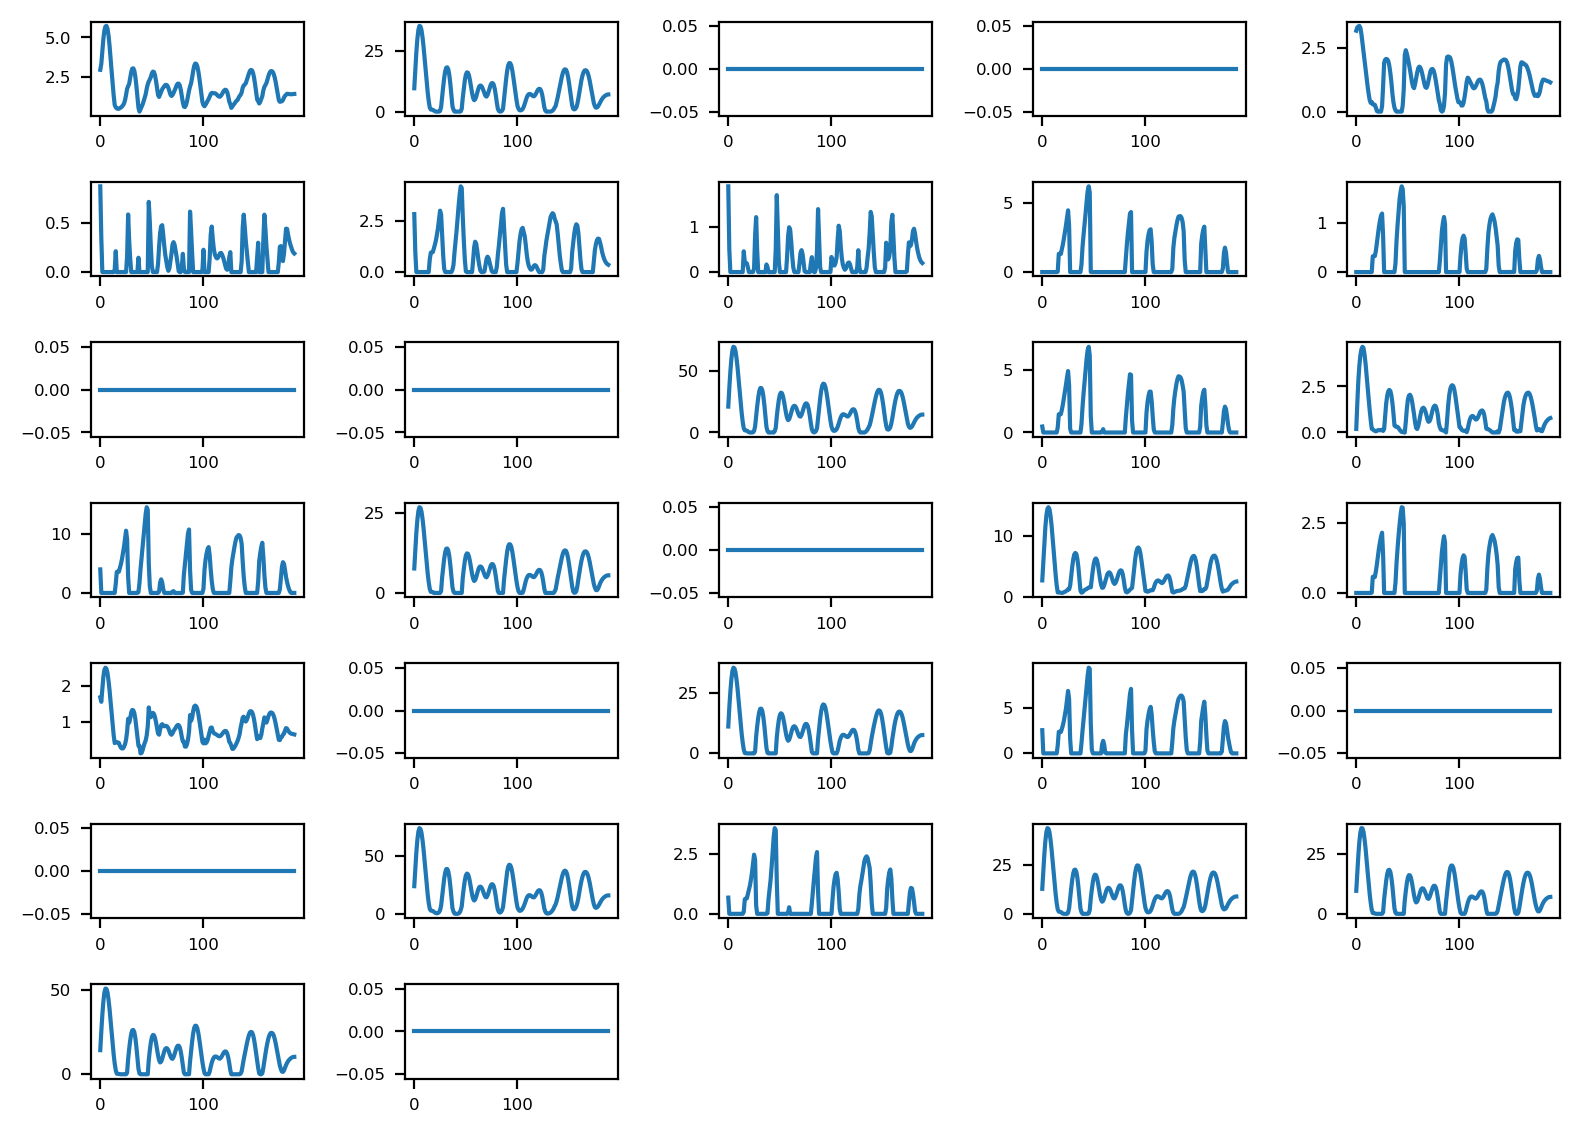

(1, 6048)


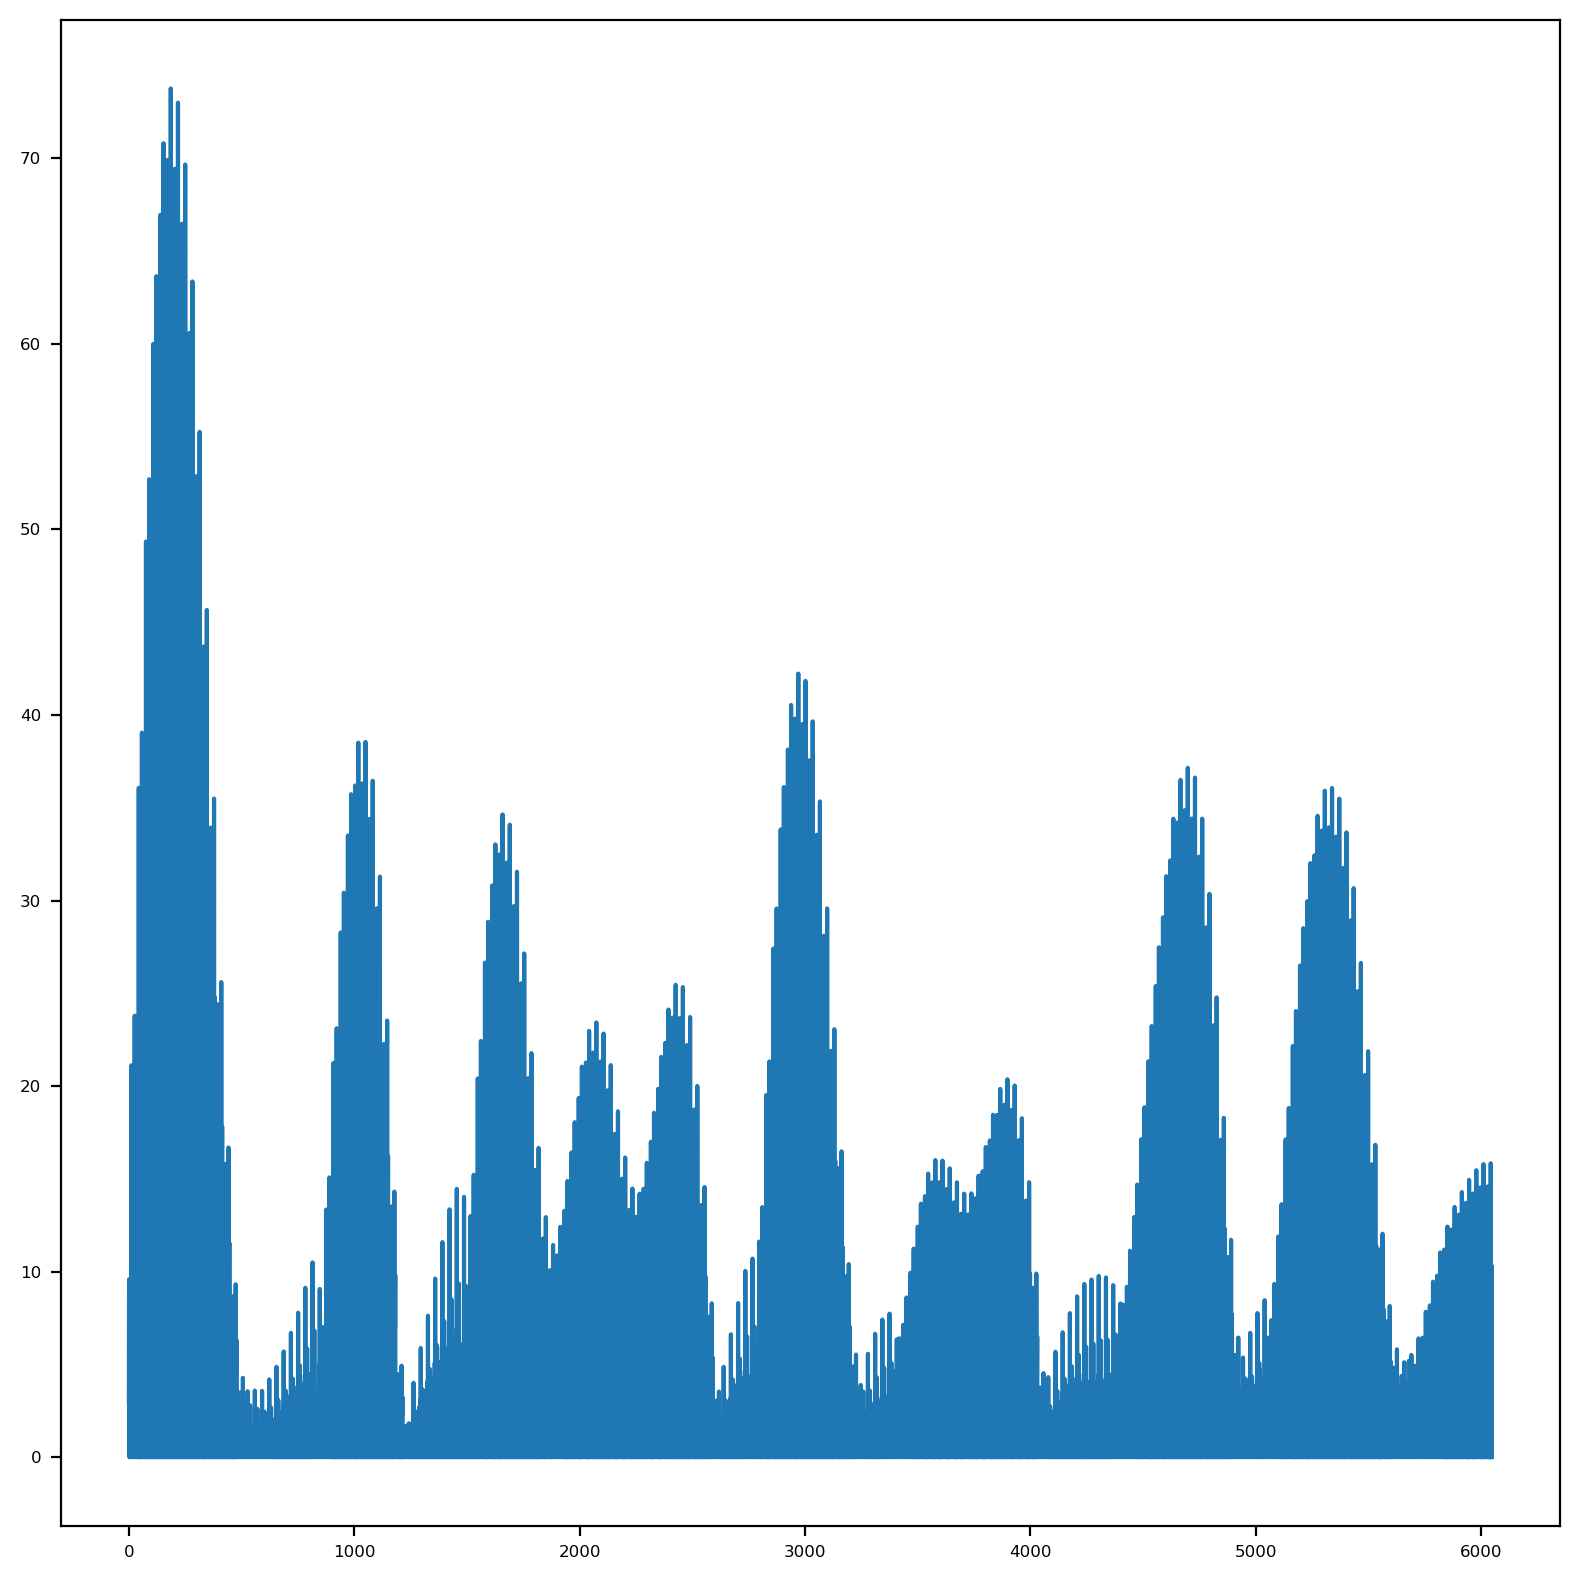

(1, 4)


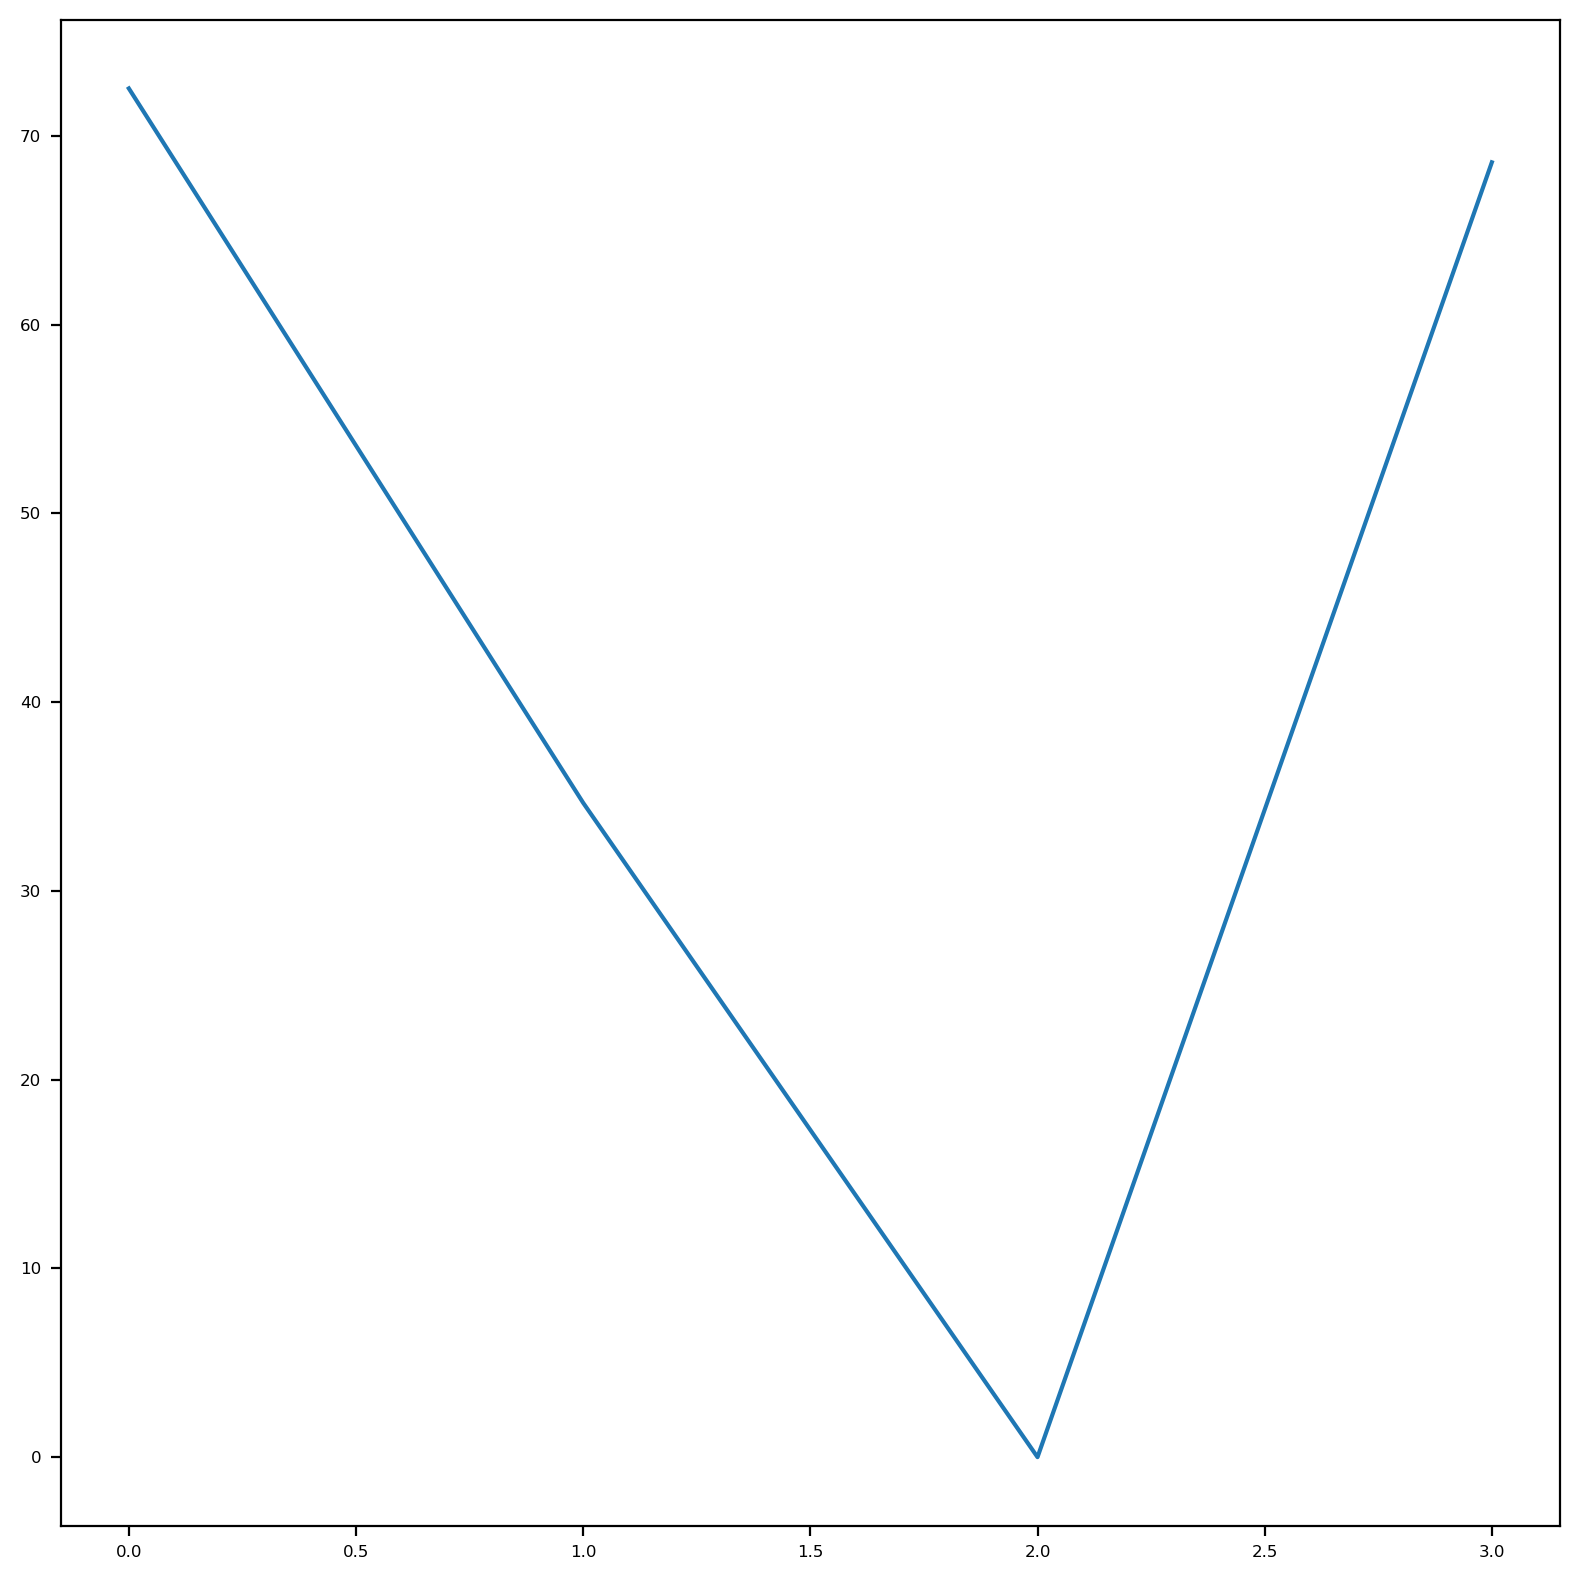

In [53]:
# visualize feature maps output from each block in the model

# ixs = [0, 1, 2, 3, 4, 5, 6, 7]
outputs = [model.layers[i].output for i in range(len(model.layers))]
model_vis = tf.keras.Model(inputs=model.inputs, outputs=outputs)

feature_maps = model_vis.predict(X_exp_3d_vis)
# feature_maps = model_vis.predict(X_simu_3d_vis)
# feature_maps = model_vis.predict(X_exp_3d_vis_perf)

layer_i = 0
# plot the output from each block
for fmap in feature_maps:
    # plot all 64 maps in an 8x8 squares
#     print(model_vis.layers[layer_i].name)
    ix = 1
    if layer_i < 8:#model_vis.layers[layer_i].name != "dense" and model_vis.layers[layer_i].name != "flatten":
        n_PDF, x_range, n_filters = np.shape(fmap)
        print(n_PDF, x_range, n_filters)
        fake_x = np.arange(0,x_range)
        fig = pyplot.figure(figsize=(8,8), dpi = 200)
        # specify subplot and turn of axis
        for i in range(n_filters):
            if n_filters <= 50:
                ax = pyplot.subplot(10, 5, ix)
            else:
                ax = pyplot.subplot(15, 5, ix)
                
#             ax.set_xticks([])
#             ax.set_yticks([])
            # plot filter channel in grayscale
            pyplot.plot(fake_x, fmap[0,:,i])
            # pyplot.imshow(fmap[0, :,  ix-1], cmap='gray')
            pyplot.setp(ax.get_xticklabels(), fontsize=6)
            pyplot.setp(ax.get_yticklabels(), fontsize=6)
            fig.tight_layout()
            ix += 1
        layer_i += 1


    else:
        n_filters, x_range = np.shape(fmap)
        print(np.shape(fmap))
        fake_x = np.arange(0,x_range)
        fig = pyplot.figure(figsize=(8,8), dpi = 200)
        # specify subplot and turn of axis
        for i in range(n_filters):
            ax = pyplot.subplot(1,1, ix)
#             ax.set_xticks([])
#             ax.set_yticks([])
            # plot filter channel in grayscale
            pyplot.plot(fake_x, fmap[0,:])
            # pyplot.imshow(fmap[0, :,  ix-1], cmap='gray')
            pyplot.setp(ax.get_xticklabels(), fontsize=6)
            pyplot.setp(ax.get_yticklabels(), fontsize=6)
            fig.tight_layout()            
            ix += 1
        layer_i += 1
    

    # show the figure
    pyplot.show()


In [ ]:
np.shape(fmap)

In [ ]:
np.shape(feature_maps[2])

In [ ]:
feature_maps[:2]

# Get Box Plot

In [80]:
def create_model():
    model = Sequential()
    model.add(Conv1D(filters=20, 
        kernel_size=5, 
        strides = 1, 
        activation='tanh', input_shape=(n_timesteps,n_features)))


    model.add(MaxPooling1D(pool_size= 2))


    model.add(Conv1D(filters=20,
        kernel_size= 45, 
        strides = 1, 
        activation='relu', input_shape=(n_timesteps,n_features)))

    model.add(MaxPooling1D(pool_size = 2))

    model.add(Dropout(0.1))
    model.add(Dense(40,activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))

    model.add(Flatten())              
    model.add(Dense(n_outputs, activation= 'relu' )) #, 'tanh', 'sigmoid'
    model.compile(loss='mean_squared_error',optimizer='adam', metrics=['RootMeanSquaredError'])
    return model

In [81]:
model = create_model()
model.summary()

Model: "sequential_111"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_222 (Conv1D)         (None, 846, 20)           120       
                                                                 
 max_pooling1d_222 (MaxPooli  (None, 423, 20)          0         
 ng1D)                                                           
                                                                 
 conv1d_223 (Conv1D)         (None, 379, 20)           18020     
                                                                 
 max_pooling1d_223 (MaxPooli  (None, 189, 20)          0         
 ng1D)                                                           
                                                                 
 dropout_111 (Dropout)       (None, 189, 20)           0         
                                                                 
 dense_444 (Dense)           (None, 189, 40)        

RMSE:6.70414400100708
dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])


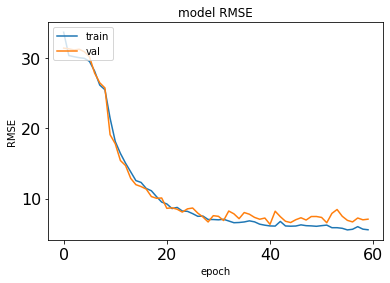

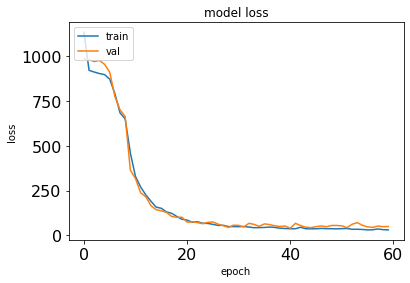

Epoch 1/50
32/32 [==============================] - 6s 177ms/step - loss: 1147.6405 - root_mean_squared_error: 33.8768 - val_loss: 975.2899 - val_root_mean_squared_error: 31.2296
Epoch 2/50
32/32 [==============================] - 5s 165ms/step - loss: 960.4631 - root_mean_squared_error: 30.9913 - val_loss: 968.5778 - val_root_mean_squared_error: 31.1220
Epoch 3/50
32/32 [==============================] - 5s 165ms/step - loss: 949.0511 - root_mean_squared_error: 30.8067 - val_loss: 970.0614 - val_root_mean_squared_error: 31.1458
Epoch 4/50
32/32 [==============================] - 5s 163ms/step - loss: 945.0078 - root_mean_squared_error: 30.7410 - val_loss: 965.1196 - val_root_mean_squared_error: 31.0664
Epoch 5/50
32/32 [==============================] - 5s 166ms/step - loss: 941.0952 - root_mean_squared_error: 30.6773 - val_loss: 952.7866 - val_root_mean_squared_error: 30.8672
Epoch 6/50
32/32 [==============================] - 5s 165ms/step - loss: 934.2115 - root_mean_squared_error:

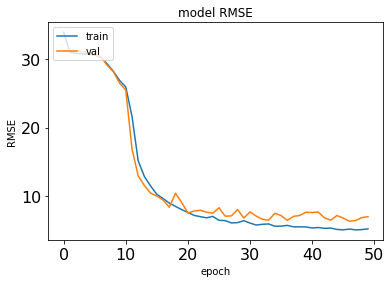

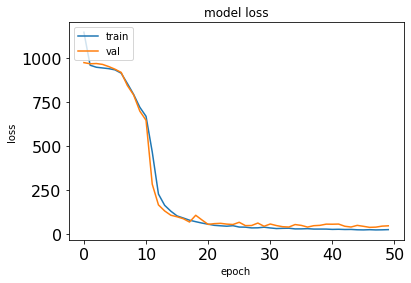

Previous Work: 
[58.235542 23.442049  0.       44.70765 ]
Perfect Structure: 
[0. 0. 0. 0.]


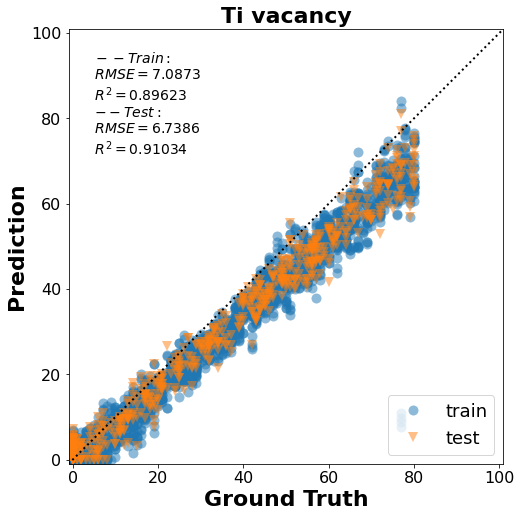

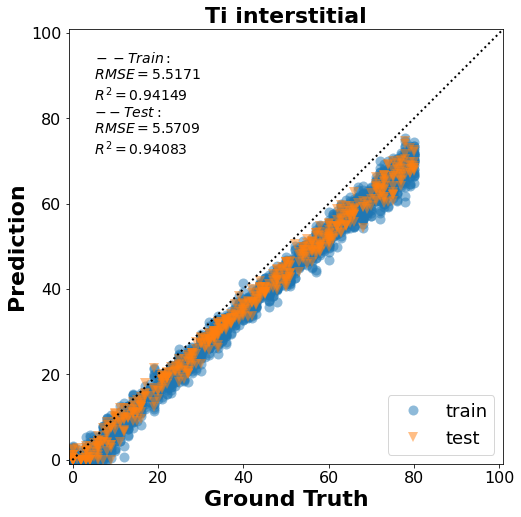

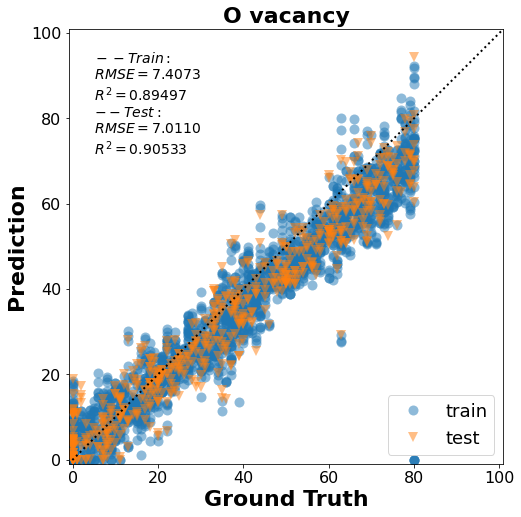

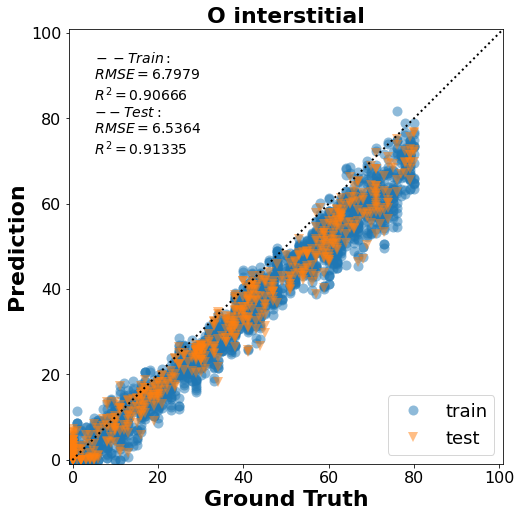

In [178]:
# Sanity check on one model before diving for 100 models
import tensorflow.python.keras.backend as K

# model=tuner.get_best_models(num_models=1)[0]
# model = load_model(f_name)
model = create_model()
# list all data in history
_, RMSE = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
print("RMSE:" + str(RMSE))
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model RMSE')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

model = tensorflow.keras.models.clone_model(model)
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['RootMeanSquaredError'])
history = model.fit(trainX, trainy, validation_split = val_split, epochs=epochs, batch_size=batch_size, verbose=verbose)


# list all data in history
_, RMSE = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
print("RMSE:" + str(RMSE))
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model RMSE')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

X_exp = df_exp.copy()
# display(X_exp)
X_exp_3d = np.reshape(np.array(X_exp), (X_exp.shape[0], X_exp.shape[1], 1))

predicted_exp = model.predict(X_exp_3d)
print("Previous Work: ")
print(predicted_exp[24])
print("Perfect Structure: ")
print(predicted_exp[34])


import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Font for figure for publishing
font_axis_publish = {
        'color':  'black',
        'weight': 'bold',
        'size': 22,
        }
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16

train_pred = model.predict(X_train_3d)
train_true = y_train

test_pred = model.predict(X_test_3d)
test_true = y_test

# train_pred = regr.predict(X_pca_nn_train)
# train_true = y_train

# test_pred = regr.predict(X_pca_nn_test)
# test_true = y_test

for i in range(4):

    # Plot Figures
    fignow = plt.figure(figsize=(8,8))

    
    defect_str = defect_str_lst[i]

    plt_train_pred = train_pred[:,i] 
    plt_train_true = train_true.iloc[:,i]

    plt_test_pred = test_pred[:,i] 
    plt_test_true = test_true.iloc[:,i]
    
## find the boundaries of X and Y values
# bounds = (min(x2plt_Ti.min(), x2plt_Ti.min()) - int(0.1 * y2plt_Ti.min()), max(x2plt.max(), y2plt_Ti.max())+ int(0.1 * y2plt_Ti.max()))
    bounds = (-1, 101)

    # Reset the limits
    ax = plt.gca()
    ax.set_xlim(bounds)
    ax.set_ylim(bounds)
    # Ensure the aspect ratio is square
    ax.set_aspect("equal", adjustable="box")

    plt.plot(plt_train_true,plt_train_pred,"o", alpha=0.5 ,ms=10, markeredgewidth=0.0, label = "train")
    plt.plot(plt_test_true,plt_test_pred,"v", alpha=0.5 ,ms=10, markeredgewidth=0.0, label = "test")

    ax.plot([0, 1], [0, 1], "k:",lw=2 ,transform=ax.transAxes)

    # Calculate Statistics of the Parity Plot 

    rmse_train = np.sqrt(np.mean((plt_train_pred-plt_train_true)**2))
    rmse_test = np.sqrt(np.mean((plt_test_pred-plt_test_true)**2))


    text = f"$\: -- Train: $ \n $ RMSE = {rmse_train:0.4f}$ \n $R^2 = {r2_score(plt_train_pred,plt_train_true):0.5f}$ \n $ --Test: $ \n $ RMSE = {rmse_test:0.4f}$ \n $R^2 = {r2_score(plt_test_pred,plt_test_true):0.5f}$"

    plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
         fontsize=14, verticalalignment='top')

    # Title and labels 
    plt.title(defect_str, fontdict=font_axis_publish)
    plt.ylabel('Prediction', fontdict=font_axis_publish)
    plt.xlabel('Ground Truth', fontdict=font_axis_publish)
    plt.legend(loc = "lower right", fontsize = 18)
    plt.show()

# Save the figure into 300 dpi
# fignow.savefig("parityplot.png",format = "png",dpi=300,bbox_inches='tight')

In [83]:
%%time
import tensorflow 

X = df_all.iloc[:,:-4]
y_simu = df_all.iloc[:,-4:]

defect_str_lst = ["Ti vacancy","Ti interstitial","O vacancy","O interstitial"]

X_exp = df_exp.copy()
# display(X_exp)
X_exp_3d = np.reshape(np.array(X_exp), (X_exp.shape[0], X_exp.shape[1], 1))

# model = load_model(f_name)
model = create_model()

train_R2_ls = []
test_R2_ls = []
train_RMSE_ls = []
test_RMSE_ls = []

score_ls = []
predict_exp_ls = []
predict_perfect_ls = []
history_ls = []
for i in range(100):

    random_state = 5*i+3
    print("Training model " + str(i) + " of 100.")
    X_train, X_test, y_train, y_test = train_test_split(X, y_simu, test_size=0.2, random_state=42)
    X_train_3d = np.reshape(np.array(X_train), (X_train.shape[0], X_train.shape[1], 1)) 
    X_test_3d = np.reshape(np.array(X_test), (X_test.shape[0], X_test.shape[1], 1)) 
    
    tensorflow.random.set_seed(random_state)
    
#     model = tensorflow.keras.models.clone_model(model)
#     model.compile(loss='mean_squared_error',optimizer='adam', metrics=['RootMeanSquaredError'])
    model = create_model()
    history = model.fit(trainX, trainy, validation_split = val_split, epochs=60, batch_size=batch_size, verbose=0)

    # evaluate model
    if history.history['root_mean_squared_error'][-1] > 10:
        print("========= BAD APPLE! ===========")
        print(history.history['root_mean_squared_error'][0], history.history['root_mean_squared_error'][-1])
        continue
    else:
        history_ls.append(history)
        print(history.history['root_mean_squared_error'][0], history.history['root_mean_squared_error'][-1])

        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        rmse_train = mean_squared_error(train_pred, y_train, multioutput = 'raw_values')
        rmse_test = mean_squared_error(test_pred,y_test, multioutput = 'raw_values')
        R2_train = r2_score(train_pred,y_train, multioutput = 'raw_values')
        R2_test = r2_score(test_pred,y_test, multioutput = 'raw_values')

        predicted_exp = model.predict(X_exp_3d)

        predict_exp_ls.append(predicted_exp[24])
        predict_perfect_ls.append(predicted_exp[34])
    
        train_R2_ls.append(R2_train)
        test_R2_ls.append(R2_test)
        train_RMSE_ls.append(rmse_train)
        test_RMSE_ls.append(rmse_test)        


Training model 0 of 100.
31.702659606933594 5.4558305740356445
Training model 1 of 100.
30.50192642211914 5.3612775802612305
Training model 2 of 100.
========= BAD APPLE! ===========
34.10251998901367 21.553508758544922
Training model 3 of 100.
========= BAD APPLE! ===========
34.77825164794922 21.674402236938477
Training model 4 of 100.
32.279727935791016 5.0974249839782715
Training model 5 of 100.
========= BAD APPLE! ===========
36.30976486206055 29.236024856567383
Training model 6 of 100.
========= BAD APPLE! ===========
33.66173553466797 20.876514434814453
Training model 7 of 100.
34.059532165527344 5.198278903961182
Training model 8 of 100.
34.83946990966797 5.88198709487915
Training model 9 of 100.
32.359352111816406 5.13055944442749
Training model 10 of 100.
31.439931869506836 5.322044372558594
Training model 11 of 100.
========= BAD APPLE! ===========
34.25204849243164 21.586450576782227
Training model 12 of 100.
31.656341552734375 4.968107223510742
Training model 13 of 100.
3

In [84]:
test_RMSE_ls = np.sqrt(test_RMSE_ls)
train_RMSE_ls = np.sqrt(train_RMSE_ls)

In [85]:
np.save('0422-CNN-TiO2-def.npy', predict_exp_ls) # save
np.save('0422-CNN-TiO2-perf.npy', predict_perfect_ls) # save
np.save('0422-CNN-TiO2-R2Train.npy', train_R2_ls) # save
np.save('0422-CNN-TiO2-R2Test.npy', test_R2_ls) # save
np.save('0422-CNN-TiO2-RMSETrain.npy', train_RMSE_ls) # save
np.save('0422-CNN-TiO2-RMSETest.npy', test_RMSE_ls) # save

In [88]:
def print_err(ls_a):
    s = ""
    for i in range(4):        
        s+='{:.4f}('.format(np.mean(ls_a, axis = 0)[i])+u"\u00B1"+"{:.4f})".format(np.std(ls_a, axis = 0)[i])
        s+=' '
    print(s)

In [89]:

print("exp_mean:")
display(np.mean(predict_exp_ls,axis = 0))
print("exp_std:")
display(np.std(predict_exp_ls, axis = 0))

print("perf_mean:")
display(np.mean(predict_perfect_ls, axis = 0))
print("perf_std:")
display(np.std(predict_perfect_ls, axis = 0))

print("Defected:")
print_err(predict_exp_ls)

print("Perfect:")
print_err(predict_perfect_ls)

exp_mean:


array([53.74485 , 25.937231,  0.      , 34.187634], dtype=float32)

exp_std:


array([16.060726,  8.86458 ,  0.      , 20.104563], dtype=float32)

perf_mean:


array([0.        , 0.04080652, 1.0998623 , 0.5351531 ], dtype=float32)

perf_std:


array([0.       , 0.3364991, 2.437845 , 1.4722898], dtype=float32)

Defected:
53.7449(±16.0607) 25.9372(±8.8646) 0.0000(±0.0000) 34.1876(±20.1046) 
Perfect:
0.0000(±0.0000) 0.0408(±0.3365) 1.0999(±2.4378) 0.5352(±1.4723) 


In [90]:
np.min(predict_perfect_ls)

0.0

In [76]:
predict_exp_ls

array([[49.725758 , 35.154408 ,  0.       , 62.440113 ],
       [55.634075 , 24.78844  ,  0.       , 37.045822 ],
       [55.542248 ,  8.365104 ,  0.       , 48.447685 ],
       [45.994717 , 30.05385  ,  0.       ,  0.       ],
       [30.460762 , 23.854773 ,  0.       , 24.409304 ],
       [46.579582 , 26.520208 ,  0.       , 39.737114 ],
       [56.762314 , 29.245045 ,  0.       , 37.972843 ],
       [40.63353  , 23.471237 ,  0.       , 41.02689  ],
       [44.068546 , 27.9955   ,  0.       , 14.733449 ],
       [53.76115  , 33.350906 ,  0.       , 21.925634 ],
       [70.71132  , 35.02365  ,  0.       , 42.50425  ],
       [19.172192 , 10.899152 ,  0.       ,  0.       ],
       [48.1791   , 25.4838   ,  0.       , 45.155228 ],
       [68.431526 , 15.400573 ,  0.       , 50.517136 ],
       [70.84069  ,  0.       ,  0.       , 60.84761  ],
       [30.290073 , 28.168106 ,  0.       , 17.916664 ],
       [27.515848 , 27.858839 ,  0.       ,  0.       ],
       [64.478676 , 22.395618 ,

In [92]:
def print_err(ls_a):
    s = ""
    for i in range(4):        
        s+='{:.3f}('.format(np.mean(ls_a, axis = 0)[i])+u"\u00B1"+"{:.3f})".format(np.std(ls_a, axis = 0)[i])
        s+=' '
    print(s)

In [93]:
print("Train RMSE:")
print_err(train_RMSE_ls)

print("Test RMSE:")
print_err(test_RMSE_ls)

print("Train R2:")
print_err(train_R2_ls)

print("Test R2:")
print_err(test_R2_ls)



Train RMSE:
6.366(±0.943) 4.082(±0.890) 7.959(±1.062) 6.139(±0.975) 
Test RMSE:
5.977(±1.027) 4.128(±0.908) 7.478(±1.104) 6.020(±0.948) 
Train R2:
0.916(±0.031) 0.968(±0.015) 0.873(±0.041) 0.923(±0.027) 
Test R2:
0.929(±0.031) 0.967(±0.015) 0.888(±0.039) 0.926(±0.026) 


In [95]:
model.summary()

Model: "sequential_214"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_428 (Conv1D)         (None, 846, 20)           120       
                                                                 
 max_pooling1d_428 (MaxPooli  (None, 423, 20)          0         
 ng1D)                                                           
                                                                 
 conv1d_429 (Conv1D)         (None, 379, 20)           18020     
                                                                 
 max_pooling1d_429 (MaxPooli  (None, 189, 20)          0         
 ng1D)                                                           
                                                                 
 dropout_214 (Dropout)       (None, 189, 20)           0         
                                                                 
 dense_856 (Dense)           (None, 189, 40)        

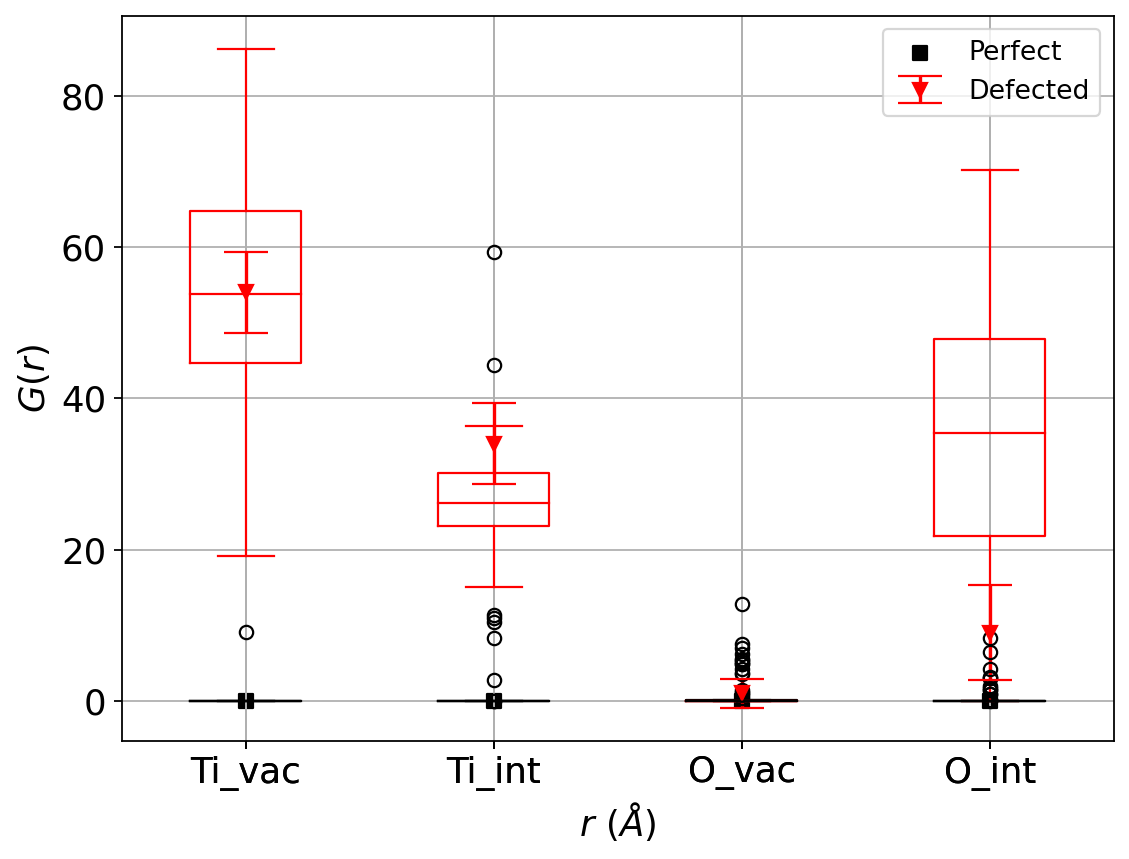

In [68]:
defect_label = [54, 34, 1, 9]
perfect_label = [0, 0, 0, 0]

defect_label_err = [5.35, 5.35, 1.89, 6.27]

x_axis = [1, 2, 3, 4]
fig, ax = plt.subplots(figsize=(8, 6), dpi = 160)

df_exp_preds = pd.DataFrame(predict_exp_ls,
                  columns=["Ti_vac", "Ti_int", "O_vac", "O_int"])
df_perf_preds = pd.DataFrame(predict_perfect_ls,
                  columns=["Ti_vac", "Ti_int", "O_vac", "O_int"])

df_exp_preds.boxplot(
    color=dict(boxes='r', whiskers='r', medians='r', caps='r'),
    column=["Ti_vac", "Ti_int", "O_vac", "O_int"])
df_perf_preds.boxplot(
        color=dict(boxes='k', whiskers='k', medians='k', caps='k'),
    column=["Ti_vac", "Ti_int", "O_vac", "O_int"])
    

plt.scatter(x_axis, perfect_label, c = 'k', marker = "s", label = 'Perfect')
plt.errorbar(x_axis, defect_label, defect_label_err, c = "r", fmt="v", capsize= 10, label = 'Defected')
# plt.scatter(x_axis, defect_label, c = 'r', marker = "v", label = 'Defected')


plt.ylabel(r'$G(r)$', fontsize = 16)
plt.xlabel(r'$r~(\AA)$', fontsize = 16)
# plt.ylim([-4,6])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize = 12, loc = "upper right")
plt.show()




RMSE:6.530362129211426
dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])


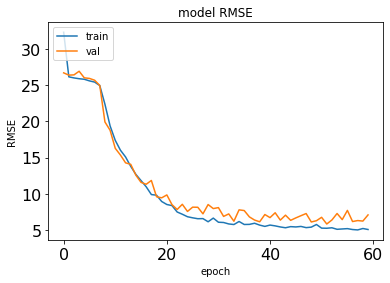

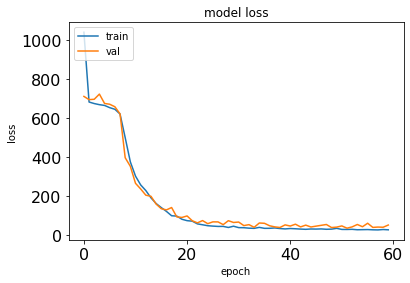

In [63]:
# list all data in history
_, RMSE = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
print("RMSE:" + str(RMSE))
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model RMSE')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
i = 1
random_state = 5*1+3
print("Training model " + str(i))
X_train, X_test, y_train, y_test = train_test_split(X, y_simu, test_size=0.2, random_state=42)
X_train_3d = np.reshape(np.array(X_train), (X_train.shape[0], X_train.shape[1], 1)) 
X_test_3d = np.reshape(np.array(X_test), (X_test.shape[0], X_test.shape[1], 1)) 

tensorflow.random.set_seed(random_state)

model = create_model()
history = model.fit(trainX, trainy, validation_split = val_split, epochs=60, batch_size=batch_size, verbose=1)


Previous Work: 
[55.634075 24.78844   0.       37.045822]
Perfect Structure: 
[0. 0. 0. 0.]


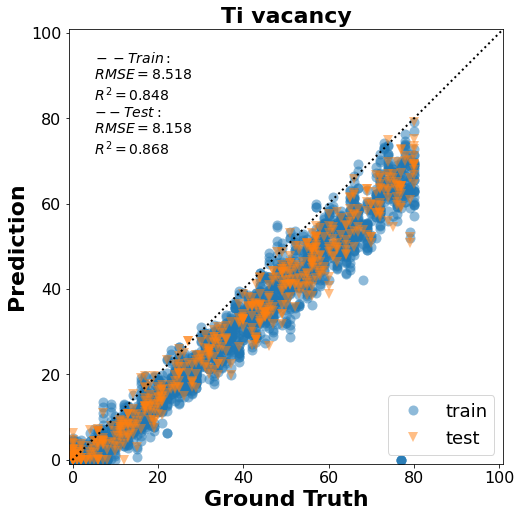

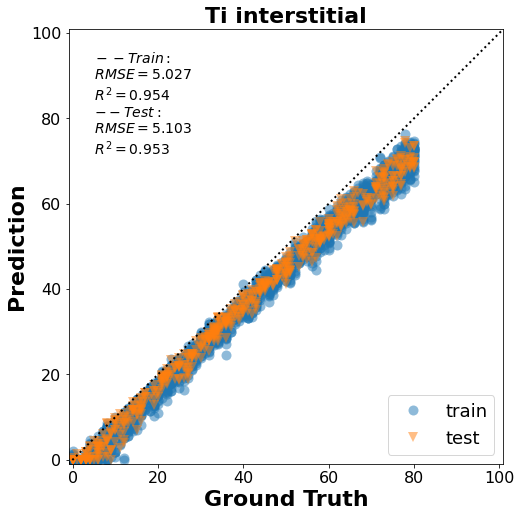

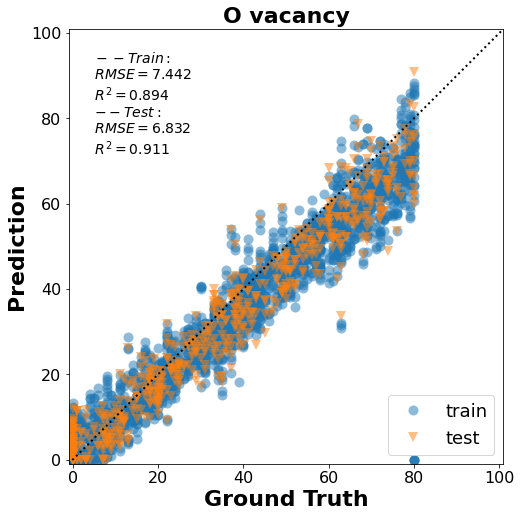

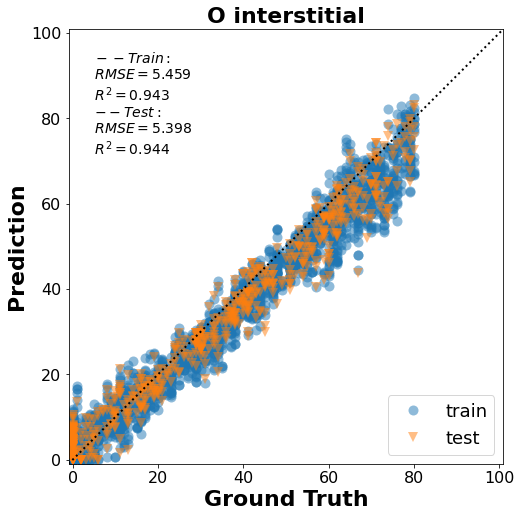

In [79]:

X_exp = df_exp.copy()
# display(X_exp)
X_exp_3d = np.reshape(np.array(X_exp), (X_exp.shape[0], X_exp.shape[1], 1))

predicted_exp = model.predict(X_exp_3d)
print("Previous Work: ")
print(predicted_exp[24])
print("Perfect Structure: ")
print(predicted_exp[34])

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Font for figure for publishing
font_axis_publish = {
        'color':  'black',
        'weight': 'bold',
        'size': 22,
        }
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16

train_pred = model.predict(X_train_3d)
train_true = y_train

test_pred = model.predict(X_test_3d)
test_true = y_test

# train_pred = regr.predict(X_pca_nn_train)
# train_true = y_train

# test_pred = regr.predict(X_pca_nn_test)
# test_true = y_test

for i in range(4):

    # Plot Figures
    fignow = plt.figure(figsize=(8,8))

    
    defect_str = defect_str_lst[i]

    plt_train_pred = train_pred[:,i] 
    plt_train_true = train_true.iloc[:,i]

    plt_test_pred = test_pred[:,i] 
    plt_test_true = test_true.iloc[:,i]
    
## find the boundaries of X and Y values
# bounds = (min(x2plt_Ti.min(), x2plt_Ti.min()) - int(0.1 * y2plt_Ti.min()), max(x2plt.max(), y2plt_Ti.max())+ int(0.1 * y2plt_Ti.max()))
    bounds = (-1, 101)

    # Reset the limits
    ax = plt.gca()
    ax.set_xlim(bounds)
    ax.set_ylim(bounds)
    # Ensure the aspect ratio is square
    ax.set_aspect("equal", adjustable="box")

    plt.plot(plt_train_true,plt_train_pred,"o", alpha=0.5 ,ms=10, markeredgewidth=0.0, label = "train")
    plt.plot(plt_test_true,plt_test_pred,"v", alpha=0.5 ,ms=10, markeredgewidth=0.0, label = "test")

    ax.plot([0, 1], [0, 1], "k:",lw=2 ,transform=ax.transAxes)

    # Calculate Statistics of the Parity Plot 

    rmse_train = np.sqrt(np.mean((plt_train_pred-plt_train_true)**2))
    rmse_test = np.sqrt(np.mean((plt_test_pred-plt_test_true)**2))


    text = f"$\: -- Train: $ \n $ RMSE = {rmse_train:0.3f}$ \n $R^2 = {r2_score(plt_train_pred,plt_train_true):0.3f}$ \n $ --Test: $ \n $ RMSE = {rmse_test:0.3f}$ \n $R^2 = {r2_score(plt_test_pred,plt_test_true):0.3f}$"

    plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
         fontsize=14, verticalalignment='top')

    # Title and labels 
    plt.title(defect_str, fontdict=font_axis_publish)
    plt.ylabel('Prediction', fontdict=font_axis_publish)
    plt.xlabel('Ground Truth', fontdict=font_axis_publish)
    plt.legend(loc = "lower right", fontsize = 18)
    plt.show()

# Save the figure into 300 dpi
# fignow.savefig("parityplot.png",format = "png",dpi=300,bbox_inches='tight')

In [78]:
predicted_exp = model.predict(X_exp_3d)
print("Previous Work: ")
print(predicted_exp[24])
print("Perfect Structure: ")
print(predicted_exp[34])

Previous Work: 
[55.634075 24.78844   0.       37.045822]
Perfect Structure: 
[0. 0. 0. 0.]


# Examine 1 model

In [ ]:
X = df_all.iloc[:,:-4]
y_simu = df_all.iloc[:,-4:]

defect_str_lst = ["Ti vacancy","Ti interstitial","O vacancy","O interstitial"]
X_train, X_test, y_train, y_test = train_test_split(X, y_simu, test_size=0.2, random_state=387)
X_train_3d = np.reshape(np.array(X_train), (X_train.shape[0], X_train.shape[1], 1)) 
X_test_3d = np.reshape(np.array(X_test), (X_test.shape[0], X_test.shape[1], 1)) 

# Model version 2:
# fit and evaluate a model
trainX, trainy, testX, testy = X_train_3d, y_train, X_test_3d, y_test
verbose, epochs, batch_size = 1, 50, 32
val_split = 0.2
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]

random_state = 77
tensorflow.random.set_seed(random_state)


# model = Sequential()
# model.add(Conv1D(filters=40, kernel_size=10, activation='relu', input_shape=(n_timesteps,n_features)))
# model.add(Dropout(0.5))
# model.add(AveragePooling1D(pool_size=5))
# model.add(Flatten())
# model.add(Dense(n_outputs, activation='relu'))
# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['RootMeanSquaredError'])



# model = Sequential()
# model.add(Conv1D(filters=10, kernel_size=40, activation='tanh', input_shape=(n_timesteps,n_features)))
# model.add(MaxPooling1D(pool_size=4))
# model.add(Conv1D(filters=10, kernel_size=20, activation='relu', input_shape=(n_timesteps,n_features)))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())
# model.add(Dense(20, activation='relu'))
# model.add(Dense(10, activation='relu'))

# model.add(Dense(n_outputs, activation='relu'))
# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['RootMeanSquaredError'])

# Below is a set of hyper params that generally gives good results:
model = Sequential()
model.add(Conv1D(filters=40, kernel_size=20, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(MaxPooling1D(pool_size=4))
model.add(Conv1D(filters=20, kernel_size=20, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(AveragePooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(n_outputs, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['RootMeanSquaredError'])

## Below is a set of hyper params that for kernel_size = 850:
# model = Sequential()
# model.add(Conv1D(filters=20, kernel_size=850, activation='relu', input_shape=(n_timesteps,n_features)))
# model.add(Flatten())
# model.add(Dense(20, activation='relu'))
# model.add(Dense(n_outputs, activation='relu'))
# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['RootMeanSquaredError'])

# fit network
history = model.fit(trainX, trainy, validation_split = val_split, epochs=epochs, batch_size=batch_size, verbose=verbose)
# evaluate model


In [ ]:
model.summary()

In [ ]:
# list all data in history
_, RMSE = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
print("RMSE:" + str(RMSE))
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model RMSE')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
X_exp = df_exp.copy()
# display(X_exp)
X_exp_3d = np.reshape(np.array(X_exp), (X_exp.shape[0], X_exp.shape[1], 1))

predicted_exp = model.predict(X_exp_3d)
print("Previous Work: ")
print(predicted_exp[24])
print("Perfect Structure: ")
print(predicted_exp[34])


import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Font for figure for publishing
font_axis_publish = {
        'color':  'black',
        'weight': 'bold',
        'size': 22,
        }
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16

train_pred = model.predict(X_train_3d)
train_true = y_train

test_pred = model.predict(X_test_3d)
test_true = y_test

# train_pred = regr.predict(X_pca_nn_train)
# train_true = y_train

# test_pred = regr.predict(X_pca_nn_test)
# test_true = y_test

for i in range(4):

    # Plot Figures
    fignow = plt.figure(figsize=(8,8))

    
    defect_str = defect_str_lst[i]

    plt_train_pred = train_pred[:,i] 
    plt_train_true = train_true.iloc[:,i]

    plt_test_pred = test_pred[:,i] 
    plt_test_true = test_true.iloc[:,i]
    
## find the boundaries of X and Y values
# bounds = (min(x2plt_Ti.min(), x2plt_Ti.min()) - int(0.1 * y2plt_Ti.min()), max(x2plt.max(), y2plt_Ti.max())+ int(0.1 * y2plt_Ti.max()))
    bounds = (-1, 101)

    # Reset the limits
    ax = plt.gca()
    ax.set_xlim(bounds)
    ax.set_ylim(bounds)
    # Ensure the aspect ratio is square
    ax.set_aspect("equal", adjustable="box")

    plt.plot(plt_train_true,plt_train_pred,"o", alpha=0.5 ,ms=10, markeredgewidth=0.0, label = "train")
    plt.plot(plt_test_true,plt_test_pred,"v", alpha=0.5 ,ms=10, markeredgewidth=0.0, label = "test")

    ax.plot([0, 1], [0, 1], "k:",lw=2 ,transform=ax.transAxes)

    # Calculate Statistics of the Parity Plot 

    rmse_train = np.sqrt(np.mean((plt_train_pred-plt_train_true)**2))
    rmse_test = np.sqrt(np.mean((plt_test_pred-plt_test_true)**2))


    text = f"$\: -- Train: $ \n $ RMSE = {rmse_train:0.4f}$ \n $R^2 = {r2_score(plt_train_pred,plt_train_true):0.5f}$ \n $ --Test: $ \n $ RMSE = {rmse_test:0.4f}$ \n $R^2 = {r2_score(plt_test_pred,plt_test_true):0.5f}$"

    plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
         fontsize=14, verticalalignment='top')

    # Title and labels 
    plt.title(defect_str, fontdict=font_axis_publish)
    plt.ylabel('Prediction', fontdict=font_axis_publish)
    plt.xlabel('Ground Truth', fontdict=font_axis_publish)
    plt.legend(loc = "lower right", fontsize = 18)
    plt.show()

# Save the figure into 300 dpi
# fignow.savefig("parityplot.png",format = "png",dpi=300,bbox_inches='tight')

# Try One Case:

In [ ]:
# cnn model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.convolutional import AveragePooling1D

from keras.utils import to_categorical

from sklearn.model_selection import train_test_split


In [ ]:
X = df_all.iloc[:,:-4]
y_simu = df_all.iloc[:,-4:]

defect_str_lst = ["Ti vacancy","Ti interstitial","O vacancy","O interstitial"]
X_train, X_test, y_train, y_test = train_test_split(X, y_simu, test_size=0.2, random_state=0)
X_train_3d = np.reshape(np.array(X_train), (X_train.shape[0], X_train.shape[1], 1)) 
X_test_3d = np.reshape(np.array(X_test), (X_test.shape[0], X_test.shape[1], 1)) 



In [ ]:
# Model version 2:
# fit and evaluate a model
trainX, trainy, testX, testy = X_train_3d, y_train, X_test_3d, y_test
verbose, epochs, batch_size = 1, 50, 32
val_split = 0.2
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
model = Sequential()
model.add(Conv1D(filters=10, kernel_size=40, activation='tanh', input_shape=(n_timesteps,n_features)))
#     model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Conv1D(filters=10, kernel_size=20, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))

model.add(Dense(n_outputs, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['RootMeanSquaredError'])
# fit network
history = model.fit(trainX, trainy, validation_split = val_split, epochs=epochs, batch_size=batch_size, verbose=verbose)
# evaluate model


In [ ]:
model.summary()

In [ ]:
# list all data in history
_, RMSE = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
print("RMSE:" + str(RMSE))
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model RMSE')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
X_exp = df_exp.copy()
# display(X_exp)
X_exp_3d = np.reshape(np.array(X_exp), (X_exp.shape[0], X_exp.shape[1], 1))

predicted_exp = model.predict(X_exp_3d)
print("Previous Work: ")
print(predicted_exp[24])
print("Perferct Structure: ")
print(predicted_exp[34])


import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Font for figure for publishing
font_axis_publish = {
        'color':  'black',
        'weight': 'bold',
        'size': 22,
        }
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16

train_pred = model.predict(X_train_3d)
train_true = y_train

test_pred = model.predict(X_test_3d)
test_true = y_test

# train_pred = regr.predict(X_pca_nn_train)
# train_true = y_train

# test_pred = regr.predict(X_pca_nn_test)
# test_true = y_test

for i in range(4):

    # Plot Figures
    fignow = plt.figure(figsize=(8,8))

    
    defect_str = defect_str_lst[i]

    plt_train_pred = train_pred[:,i] 
    plt_train_true = train_true.iloc[:,i]

    plt_test_pred = test_pred[:,i] 
    plt_test_true = test_true.iloc[:,i]
    
## find the boundaries of X and Y values
# bounds = (min(x2plt_Ti.min(), x2plt_Ti.min()) - int(0.1 * y2plt_Ti.min()), max(x2plt.max(), y2plt_Ti.max())+ int(0.1 * y2plt_Ti.max()))
    bounds = (-1, 101)

    # Reset the limits
    ax = plt.gca()
    ax.set_xlim(bounds)
    ax.set_ylim(bounds)
    # Ensure the aspect ratio is square
    ax.set_aspect("equal", adjustable="box")

    plt.plot(plt_train_true,plt_train_pred,"o", alpha=0.5 ,ms=10, markeredgewidth=0.0, label = "train")
    plt.plot(plt_test_true,plt_test_pred,"v", alpha=0.5 ,ms=10, markeredgewidth=0.0, label = "test")

    ax.plot([0, 1], [0, 1], "k:",lw=2 ,transform=ax.transAxes)

    # Calculate Statistics of the Parity Plot 

    rmse_train = np.sqrt(np.mean((plt_train_pred-plt_train_true)**2))
    rmse_test = np.sqrt(np.mean((plt_test_pred-plt_test_true)**2))


    text = f"$\: -- Train: $ \n $ RMSE = {rmse_train:0.4f}$ \n $R^2 = {r2_score(plt_train_pred,plt_train_true):0.5f}$ \n $ --Test: $ \n $ RMSE = {rmse_test:0.4f}$ \n $R^2 = {r2_score(plt_test_pred,plt_test_true):0.5f}$"

    plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
         fontsize=14, verticalalignment='top')

    # Title and labels 
    plt.title(defect_str, fontdict=font_axis_publish)
    plt.ylabel('Prediction', fontdict=font_axis_publish)
    plt.xlabel('Ground Truth', fontdict=font_axis_publish)
    plt.legend(loc = "lower right", fontsize = 18)
    plt.show()

# Save the figure into 300 dpi
# fignow.savefig("parityplot.png",format = "png",dpi=300,bbox_inches='tight')

In [ ]:
history.history['root_mean_squared_error'][-1]

# Get Box Plot

In [ ]:
%%time
import tensorflow 

X = df_all.iloc[:,:-4]
y_simu = df_all.iloc[:,-4:]

defect_str_lst = ["Ti vacancy","Ti interstitial","O vacancy","O interstitial"]

X_exp = df_exp.copy()
# display(X_exp)
X_exp_3d = np.reshape(np.array(X_exp), (X_exp.shape[0], X_exp.shape[1], 1))

score_ls = []
predict_exp_ls = []
predict_perfect_ls = []
history_ls = []

verbose, epochs, batch_size = 0, 50, 32
val_split = 0.2

    
for i in range(120):
    random_state = 5*i+3
    print("Training model " + str(i) + " of 50.")
    X_train, X_test, y_train, y_test = train_test_split(X, y_simu, test_size=0.2, random_state=42)
    X_train_3d = np.reshape(np.array(X_train), (X_train.shape[0], X_train.shape[1], 1)) 
    X_test_3d = np.reshape(np.array(X_test), (X_test.shape[0], X_test.shape[1], 1)) 
    
    tensorflow.random.set_seed(random_state)
    
    model = Sequential()
    model.add(Conv1D(filters=10, kernel_size=40, activation='tanh', input_shape=(n_timesteps,n_features)))
    model.add(MaxPooling1D(pool_size=4))
    model.add(Conv1D(filters=10, kernel_size=20, activation='relu', input_shape=(n_timesteps,n_features)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(20, activation='relu'))
    model.add(Dense(10, activation='relu'))

    model.add(Dense(n_outputs, activation='relu'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['RootMeanSquaredError'])
    # fit network
    history = model.fit(trainX, trainy, validation_split = val_split, epochs=epochs, batch_size=batch_size, verbose=verbose)
    # evaluate model
    if history.history['root_mean_squared_error'][-1] > 10:
        print("========= BAD APPLE! ===========")
        continue
    else:
        history_ls.append(history)

        predicted_exp = model.predict(X_exp_3d)

    #     score_ls.append([model.score(X_train, y_train), regr.score(X_test, y_test)])

        predict_exp_ls.append(predicted_exp[24])
        predict_perfect_ls.append(predicted_exp[34])



In [ ]:
np.save('0126_predict_defect_CNN_fullDim_03.npy', predict_exp_ls) # save
np.save('0126_predict_perfect_CNN_fullDim_03.npy', predict_perfect_ls) # save

In [185]:
def print_err(ls_a):
    s = ""
    for i in range(4):        
        s+='{:.0f}('.format(ls_a.mean(axis = 0)[i])+u"\u00B1"+"{:.0f})".format(ls_a.std(axis = 0)[i])
        s+=' '
    print(s)

In [187]:

predict_exp_ls = np.load('0316_predict_defect_CNN_fullDim_01.npy') # load
predict_perfect_ls = np.load('0316_predict_perfect_CNN_fullDim_01.npy') # load

print("perfect:")
print(predict_perfect_ls.mean(axis = 0))
print(predict_perfect_ls.std(axis = 0))

print("defected:")
print(predict_exp_ls.mean(axis = 0))
print(predict_exp_ls.std(axis = 0))

print("Defected:")
print_err(predict_exp_ls)

print("Perfect:")
print_err(predict_perfect_ls)

perfect:
[0.        0.        1.017586  1.5606194]
[0.        0.        1.8957736 2.3539433]
defected:
[39.662334   17.619059    0.          0.56992257]
[9.585485 6.876822 0.       2.513108]
Defected:
40(±10) 18(±7) 0(±0) 1(±3) 
Perfect:
0(±0) 0(±0) 1(±2) 2(±2) 


In [ ]:
defect_label = [60, 30, 0, 5]
perfect_label = [0, 0, 0, 0]
x_axis = [1, 2, 3, 4]
fig, ax = plt.subplots(figsize=(8, 6), dpi = 160)

df_exp_preds = pd.DataFrame(predict_exp_ls,
                  columns=["Ti_vac", "Ti_int", "O_vac", "O_int"])
df_perf_preds = pd.DataFrame(predict_perfect_ls,
                  columns=["Ti_vac", "Ti_int", "O_vac", "O_int"])

df_exp_preds.boxplot(
    color=dict(boxes='r', whiskers='r', medians='r', caps='r'),
    column=["Ti_vac", "Ti_int", "O_vac", "O_int"])
df_perf_preds.boxplot(
        color=dict(boxes='k', whiskers='k', medians='k', caps='k'),
    column=["Ti_vac", "Ti_int", "O_vac", "O_int"])
    

plt.scatter(x_axis, perfect_label, c = 'k', marker = "s", label = 'Perfect')
plt.scatter(x_axis, defect_label, c = 'r', marker = "v", label = 'Defected')


plt.ylabel(r'$G(r)$', fontsize = 16)
plt.xlabel(r'$r~(\AA)$', fontsize = 16)
# plt.ylim([-4,6])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize = 12, loc = "upper right")
plt.show()




In [ ]:
# list all data in history
_, RMSE = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
print("RMSE:" + str(RMSE))
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model RMSE')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
X_exp = df_exp.copy()
# display(X_exp)
X_exp_3d = np.reshape(np.array(X_exp), (X_exp.shape[0], X_exp.shape[1], 1))

predicted_exp = model.predict(X_exp_3d)
print("Previous Work: ")
print(predicted_exp[24])
print("Perferct Structure: ")
print(predicted_exp[34])


import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Font for figure for publishing
font_axis_publish = {
        'color':  'black',
        'weight': 'bold',
        'size': 22,
        }
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16

train_pred = model.predict(X_train_3d)
train_true = y_train

test_pred = model.predict(X_test_3d)
test_true = y_test

# train_pred = regr.predict(X_pca_nn_train)
# train_true = y_train

# test_pred = regr.predict(X_pca_nn_test)
# test_true = y_test

for i in range(4):

    # Plot Figures
    fignow = plt.figure(figsize=(8,8))

    
    defect_str = defect_str_lst[i]

    plt_train_pred = train_pred[:,i] 
    plt_train_true = train_true.iloc[:,i]

    plt_test_pred = test_pred[:,i] 
    plt_test_true = test_true.iloc[:,i]
    
## find the boundaries of X and Y values
# bounds = (min(x2plt_Ti.min(), x2plt_Ti.min()) - int(0.1 * y2plt_Ti.min()), max(x2plt.max(), y2plt_Ti.max())+ int(0.1 * y2plt_Ti.max()))
    bounds = (-1, 101)

    # Reset the limits
    ax = plt.gca()
    ax.set_xlim(bounds)
    ax.set_ylim(bounds)
    # Ensure the aspect ratio is square
    ax.set_aspect("equal", adjustable="box")

    plt.plot(plt_train_true,plt_train_pred,"o", alpha=0.5 ,ms=10, markeredgewidth=0.0, label = "train")
    plt.plot(plt_test_true,plt_test_pred,"v", alpha=0.5 ,ms=10, markeredgewidth=0.0, label = "test")

    ax.plot([0, 1], [0, 1], "k:",lw=2 ,transform=ax.transAxes)

    # Calculate Statistics of the Parity Plot 

    rmse_train = np.sqrt(np.mean((plt_train_pred-plt_train_true)**2))
    rmse_test = np.sqrt(np.mean((plt_test_pred-plt_test_true)**2))


    text = f"$\: -- Train: $ \n $ RMSE = {rmse_train:0.4f}$ \n $R^2 = {r2_score(plt_train_pred,plt_train_true):0.5f}$ \n $ --Test: $ \n $ RMSE = {rmse_test:0.4f}$ \n $R^2 = {r2_score(plt_test_pred,plt_test_true):0.5f}$"

    plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
         fontsize=14, verticalalignment='top')

    # Title and labels 
    plt.title(defect_str, fontdict=font_axis_publish)
    plt.ylabel('Prediction', fontdict=font_axis_publish)
    plt.xlabel('Ground Truth', fontdict=font_axis_publish)
    plt.legend(loc = "lower right", fontsize = 18)
    plt.show()

# Save the figure into 300 dpi
# fignow.savefig("parityplot.png",format = "png",dpi=300,bbox_inches='tight')